## Fitting Ne lines in a loop
- This notebook shows how to fit all lines in a folder defined by path
- You tweak the fit for a single line, and then use this to fit all lines. You can then refit lines with high residuals/offsets differing from the rest

## Downloading locally
- The easiest way to install diad fit is by removing the #, and running this once per computer. When I update the code, you'll need to get the new tag off GitHub:
https://github.com/PennyWieser/DiadFit/tags
Right click on the top one, over the 'zip' icon, click copy link address
- Remove the # in the line below. Run only once for each computer!
![image.png](attachment:5a0e0d97-4380-4cb2-bf26-d0ab6ee7458a.png)

In [1]:
#!pip install --upgrade "https://github.com/PennyWieser/DiadFit/archive/refs/tags/0.0.15.zip"

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.21'

## Extracting metadata

In [3]:
 # Path to metadata files for Ne. Easier to have in subfolder
meta_path=r'G:\My Drive\Berkeley_NEW\DiadFit_outer\docs\Examples\High_Density_Looping_Run\metadata'
# Find files


# Put the common string you can in all your Ne lines here
ID_str='Ne'
file_ext_meta='.txt' # Will only take files of this type 
exclude_str='Fo' # Will exclude files of this type, sometimes images have same name
 # Leave as none unless witec appended a number
Ne_files_meta=pf.get_Ne_files(path=meta_path, file_ext=file_ext_meta, ID_str=ID_str, 
                         exclude_str=exclude_str, sort=False)

Ne_files_meta


['Ne_1225down_1.txt',
 'Ne_1225down_2.txt',
 'Ne_1225up_1.txt',
 'Ne_1225up_2.txt',
 'Ne_1250down_1.txt',
 'Ne_1250down_2.txt',
 'Ne_1250up_1.txt',
 'Ne_1250up_2.txt',
 'Ne_1275down_1.txt',
 'Ne_1275down_2.txt',
 'Ne_1275up_1.txt',
 'Ne_1275up_2.txt',
 'Ne_1300down_1.txt',
 'Ne_1300down_2.txt',
 'Ne_1300up_1.txt',
 'Ne_1300up_2.txt',
 'Ne_1325down_1.txt',
 'Ne_1325down_2.txt',
 'Ne_1325up_1.txt',
 'Ne_1325up_2.txt',
 'Ne_1350up_1.txt',
 'Ne_1350up_2.txt']

In [4]:
# Extract useful metadata from each file
meta=pf.stitch_metadata_in_loop(path=meta_path, Allfiles=Ne_files_meta, 
                                prefix=False, trupower=True)
meta.head()

working on fileNe_1225down_1.txt
working on fileNe_1225down_2.txt
working on fileNe_1225up_1.txt
working on fileNe_1225up_2.txt
working on fileNe_1250down_1.txt
working on fileNe_1250down_2.txt
working on fileNe_1250up_1.txt
working on fileNe_1250up_2.txt
working on fileNe_1275down_1.txt
working on fileNe_1275down_2.txt
working on fileNe_1275up_1.txt
working on fileNe_1275up_2.txt
working on fileNe_1300down_1.txt
working on fileNe_1300down_2.txt
working on fileNe_1300up_1.txt
working on fileNe_1300up_2.txt
working on fileNe_1325down_1.txt
working on fileNe_1325down_2.txt
working on fileNe_1325up_1.txt
working on fileNe_1325up_2.txt
working on fileNe_1350up_1.txt
working on fileNe_1350up_2.txt
Done


filename               date  power (mW)  Int_time (s)  \
16  Ne_1325down_1.txt  October 5, 2022\n       6.032          45.0   
12  Ne_1300down_1.txt  October 5, 2022\n       6.041          45.0   
8   Ne_1275down_1.txt  October 5, 2022\n       6.055          45.0   
4   Ne_1250down_1.txt  October 5, 2022\n       6.085          45.0   
0   Ne_1225down_1.txt  October 5, 2022\n       6.090          45.0   

    accumulations  Mag (X)             duration     24hr_time  \
16            5.0     50.0  ['0h', '3m', '47s']  1:13:06 PM\n   
12            3.0     50.0  ['0h', '2m', '16s']  1:23:12 PM\n   
8             3.0     50.0  ['0h', '2m', '16s']  1:33:51 PM\n   
4             3.0     50.0  ['0h', '2m', '16s']  1:57:31 PM\n   
0             3.0     50.0  ['0h', '2m', '16s']  2:05:44 PM\n   

    sec since midnight  Spectral Center  index  
16             47586.0         1324.987     16  
12             48192.0         1299.957     12  
8              48831.0         1274.962      8  
4              50251.0         1250.004      4  
0              50744.0         1224.986      0

In [5]:
# remove these to get the pure file name you can compare 
file_m=pf.extracting_filenames_generic(names=meta['filename'],
    prefix=False,
    suffix=False,
   file_type='.txt')

file_m

array(['Ne_1325down_1', 'Ne_1300down_1', 'Ne_1275down_1', 'Ne_1250down_1',
       'Ne_1225down_1', 'Ne_1225up_1', 'Ne_1250up_1', 'Ne_1275up_1',
       'Ne_1300up_1', 'Ne_1325up_1', 'Ne_1350up_1', 'Ne_1325down_2',
       'Ne_1300down_2', 'Ne_1275down_2', 'Ne_1250down_2', 'Ne_1225down_2',
       'Ne_1225up_2', 'Ne_1250up_2', 'Ne_1275up_2', 'Ne_1300up_2',
       'Ne_1325up_2', 'Ne_1350up_2'], dtype=object)

## Get Ne line positions for your specific laser wavelength
- At the moment, this returns any Ne lines with intensity >2000 in the NIST databook, although you can change this!

In [6]:
wavelength =532.046 # Specify the specific wavelength of your laser 
df_Ne=pf.calculate_Ne_line_positions(wavelength=wavelength, cut_off_intensity=1000)
df_Ne

Raman_shift (cm-1)    Intensity  Ne emission line in air
0           817.650482  1500.000000               556.244160
1           818.699523  5000.000000               556.276620
9          1117.086987  5000.000000               565.665880
13         1220.000000  1000.444444               568.978151
14         1220.107463  1500.000000               568.981630
16         1309.425403  1500.000000               571.887980
17         1310.480205  5000.000000               571.922480
20         1398.915133  5000.000000               574.829850
24         1447.564622  7000.000000               576.441880
27         1567.204978  5000.000000               580.444960
28         1587.829301  3000.000000               581.140660
30         1613.696683  5000.000000               582.015580

## Calculate the ideal distance between the two lines you are selecting
- This finds the closest line in the table above for the line shift you have written down

In [7]:
ideal_split=pf.calculate_Ne_splitting(wavelength=wavelength, 
                                      line1_shift=1117, line2_shift=1447,
                                     cut_off_intensity=1000)
ideal_split

Ne_Split       Line_1       Line_2  Entered Pos Line 1  \
0  330.477634  1117.086987  1447.564622                1117   

   Entered Pos Line 2  
0                1447

## Find your Ne spectra files

In [8]:
mypath=r'G:\My Drive\Berkeley_NEW\DiadFit_outer\docs\Examples\High_Density_Looping_Run\Spectra'
filetype='headless_txt'
# Put the common string you can in all your Ne lines here
ID_str='Ne'
file_ext='txt'# Will only take files of this type 
exclude_str='Fo' # Will exclude files of this type, sometimes images have same name
prefix=None # Leave as none unless witec appended a number
Ne_files=pf.get_Ne_files(path=mypath, file_ext=file_ext,
                    ID_str=ID_str, exclude_str=exclude_str, sort=True)

In [9]:
Ne_files

['Ne_1225down_1.txt',
 'Ne_1225down_2.txt',
 'Ne_1225up_1.txt',
 'Ne_1225up_2.txt',
 'Ne_1250down_1.txt',
 'Ne_1250down_2.txt',
 'Ne_1250up_1.txt',
 'Ne_1250up_2.txt',
 'Ne_1275down_1.txt',
 'Ne_1275down_2.txt',
 'Ne_1275up_1.txt',
 'Ne_1275up_2.txt',
 'Ne_1300down_1.txt',
 'Ne_1300down_2.txt',
 'Ne_1300up_1.txt',
 'Ne_1300up_2.txt',
 'Ne_1325down_1.txt',
 'Ne_1325down_2.txt',
 'Ne_1325up_1.txt',
 'Ne_1325up_2.txt',
 'Ne_1350up_1.txt',
 'Ne_1350up_2.txt']

## Select the first file you want to fit
- You can either do this numerically, or by specifiying the filename between ''

In [10]:
filename=Ne_files[0]  # Or you could put a string here, like 'NE1.txt' 

## Plot Ne lines to inspect
- This function allows you to inspect your spectra, and also uses scipy find peaks to get a first guess of the peak positions, which speeds up the voigt fitting in the later part of the notebook

Biggest 6 peaks:


pos        height
92  1447.377958  43647.667970
84  1398.625213   7592.000000
36  1116.485915   4099.333496
57  1220.077563   3029.000000
67  1310.402404   2469.666748
91  1435.888461   1908.333374

selected Peak 1 Pos
1116.485915
selected Peak 2 Pos
1447.377958


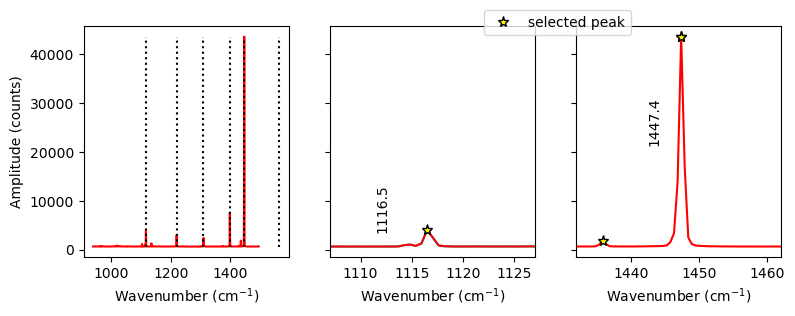

In [11]:
# Specify the approximate peak positions of the lines you are interested in
# If your drift is off the real positions, you'll have to tweak these numbers
peak1_cent=1117 # approximate position of the 1st line you are interested in
peak2_cent=1447 # Approximate position of the 2nd line you are interested in


Ne, df_sort_Ne_trim, nearest_pk1, nearest_pk2=pf.plot_Ne_lines(path=mypath, filename=filename, filetype=filetype, 
n_peaks=6, peak1_cent=peak1_cent, peak2_cent=peak2_cent,
height=10, threshold=0.6, distance=1, prominence=10, width=1, exclude_range_1=None,
exclude_range_2=None)

## You can tweak parameters here
- The default parameters may work, you can see what those are here:
- Most important things, the number of peaks you want for 1117, and the offset for this peak (LH_offset_min) if you are fitting the 1117 line as you need 2 peaks
- By default, the function applies the fit to all the points inside the outermost background positions. This can be trimmed using x_span_pk1_override, and x_span_pk2_override
- See figure from Penny for what these parameters actually are

In [12]:
pf.Ne_peak_config()

Ne_peak_config(N_poly_pk1_baseline=1, N_poly_pk2_baseline=1, lower_bck_pk1=(-50, -25), upper_bck1_pk1=(8, 15), upper_bck2_pk1=(30, 50), lower_bck_pk2=(-44.2, -22), upper_bck1_pk2=(15, 50), upper_bck2_pk2=(50, 51), x_range_baseline=20, y_range_baseline=200, pk1_amplitude=100, pk2_amplitude=100, x_range_peak=15, x_range_residual=7, LH_offset_mini=(1.5, 3), x_span_pk1=None, x_span_pk2=None)

- You can also overwrite any of these, the most likely things you'll want to overwrite are the background positions, or the amplitude

In [13]:
Ne_Config=pf.Ne_peak_config(pk1_amplitude=100, pk2_amplitude=100, LH_offset_mini=[2, 5], 
lower_bck_pk1=(-40, -30), upper_bck1_pk1=[40, 70], upper_bck2_pk1=[40, 70],
lower_bck_pk2=[-40, -30], upper_bck1_pk2=[20, 30], upper_bck2_pk2=[20, 30],
x_range_peak=15, x_span_pk1=[-10, 8], x_span_pk2=[-10, 10], N_poly_pk2_baseline=2 )
Ne_Config

Ne_peak_config(N_poly_pk1_baseline=1, N_poly_pk2_baseline=2, lower_bck_pk1=(-40, -30), upper_bck1_pk1=[40, 70], upper_bck2_pk1=[40, 70], lower_bck_pk2=[-40, -30], upper_bck1_pk2=[20, 30], upper_bck2_pk2=[20, 30], x_range_baseline=20, y_range_baseline=200, pk1_amplitude=100, pk2_amplitude=100, x_range_peak=15, x_range_residual=7, LH_offset_mini=[2, 5], x_span_pk1=[-10, 8], x_span_pk2=[-10, 10])

filename  pk2_peak_cent  pk2_amplitude  pk2_sigma  pk2_gamma  \
0  Ne_1225down_1.txt    1447.405771   45294.312975   0.219028   0.219028   

   error_pk2  pk1_peak_cent  pk1_amplitude  pk1_sigma  pk1_gamma  error_pk1  \
0    0.00534    1116.653104    3809.881318   0.198918   0.198918        NaN   

      deltaNe   Ne_Corr  Ne_Corr_min  Ne_Corr_max  residual_pk2  residual_pk1  \
0  330.752667  0.999168          NaN          NaN    206.733398     24.661297   

   residual_pk1+pk2  
0        231.394696

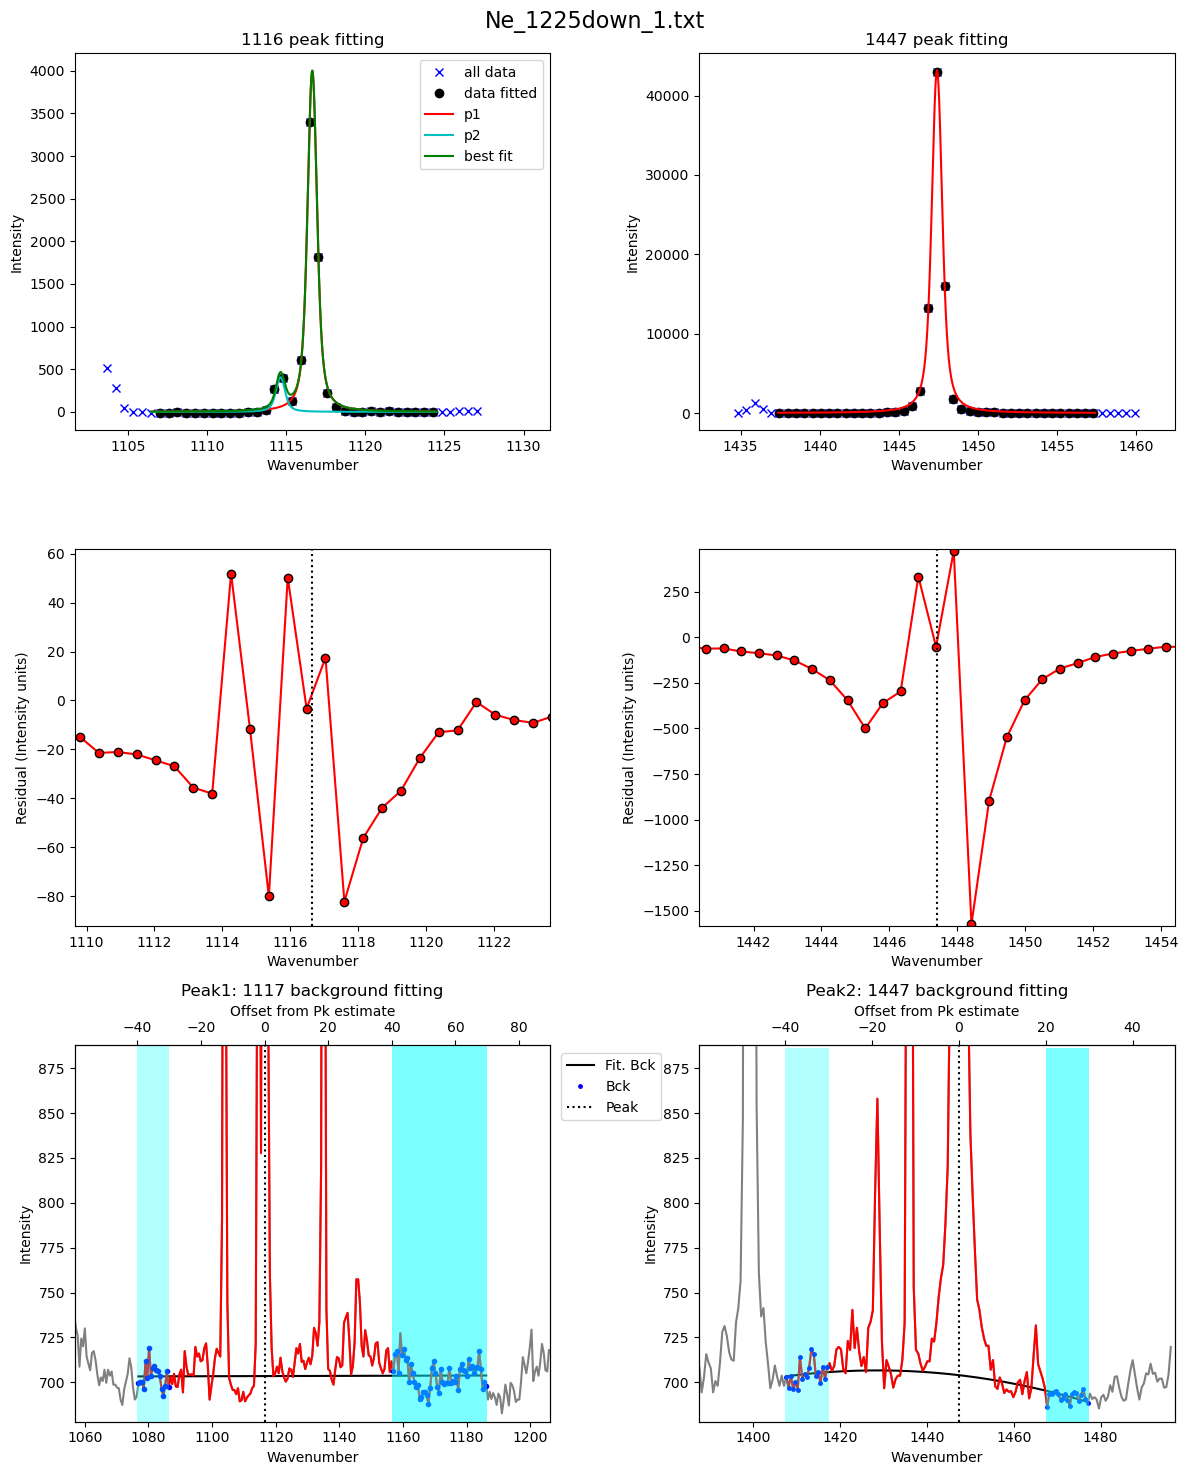

In [14]:
# You also need to set whether you want 1 peak or 2 for the LH diad
peaks_1=2

df_test=pf.fit_Ne_lines(  
    config=Ne_Config, peaks_1=peaks_1,
    Ne=Ne, filename=filename, path=mypath, prefix=prefix,
    Ne_center_1=nearest_pk1, Ne_center_2=nearest_pk2,
    DeltaNe_ideal=ideal_split['Ne_Split'], close_figure=False)                                                                 
                                                                     
        
display(df_test)

## Now you can loop over all files using these parameters
- Most important thing you can change is plot_figure=False, much quicker, but wont save or show figures, plot_figure=True will)
- If you need, you can add other parameters in the loop here. 

In [21]:
df_test['pk2_amplitude'][0]

45294.31297459702

In [22]:
## Reset parameters based on what you found with this example one
Ne_Config_reset=pf.Ne_peak_config(pk1_amplitude=df_test['pk1_amplitude'][0], 
pk2_amplitude=df_test['pk2_amplitude'][0],
LH_offset_mini=[2, 5], 
lower_bck_pk1=(-40, -30), upper_bck1_pk1=[40, 70], upper_bck2_pk1=[40, 70],
lower_bck_pk2=[-40, -30], upper_bck1_pk2=[20, 30], upper_bck2_pk2=[20, 30],
x_range_peak=15, x_span_pk1=[-10, 8], x_span_pk2=[-10, 10], N_poly_pk2_baseline=2 )
Ne_Config_reset

Ne_peak_config(N_poly_pk1_baseline=1, N_poly_pk2_baseline=2, lower_bck_pk1=(-40, -30), upper_bck1_pk1=[40, 70], upper_bck2_pk1=[40, 70], lower_bck_pk2=[-40, -30], upper_bck1_pk2=[20, 30], upper_bck2_pk2=[20, 30], x_range_baseline=20, y_range_baseline=200, pk1_amplitude=3809.881318289394, pk2_amplitude=45294.31297459702, x_range_peak=15, x_range_residual=7, LH_offset_mini=[2, 5], x_span_pk1=[-10, 8], x_span_pk2=[-10, 10])

In [23]:
len(Ne_files)

22

 91%|██████████████████████████████████████████████████████████████████████████▌       | 20/22 [00:20<00:02,  1.02s/it]g:\my drive\berkeley_new\diadfit_outer\src\DiadFit\ne_lines.py:918: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ((ax3, ax2), (ax5, ax4), (ax1, ax0)) = plt.subplots(3,2, figsize = (12,15)) # adjust dimensions of figure here
100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:22<00:00,  1.01s/it]


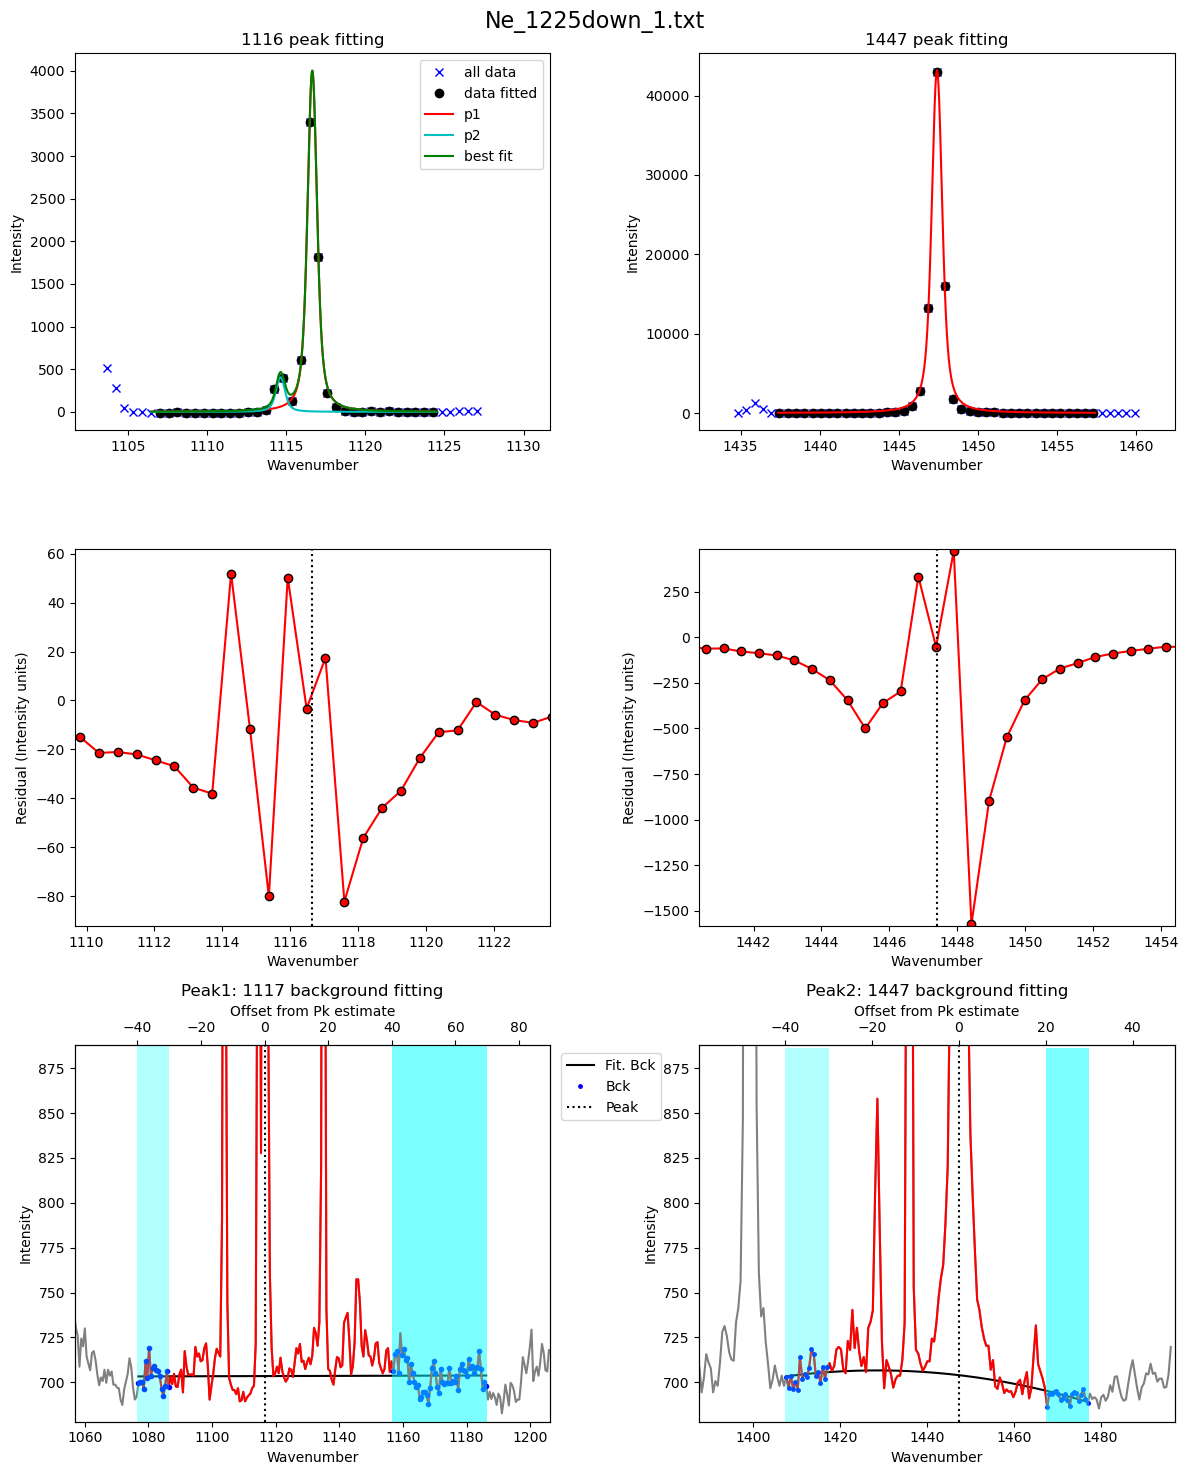

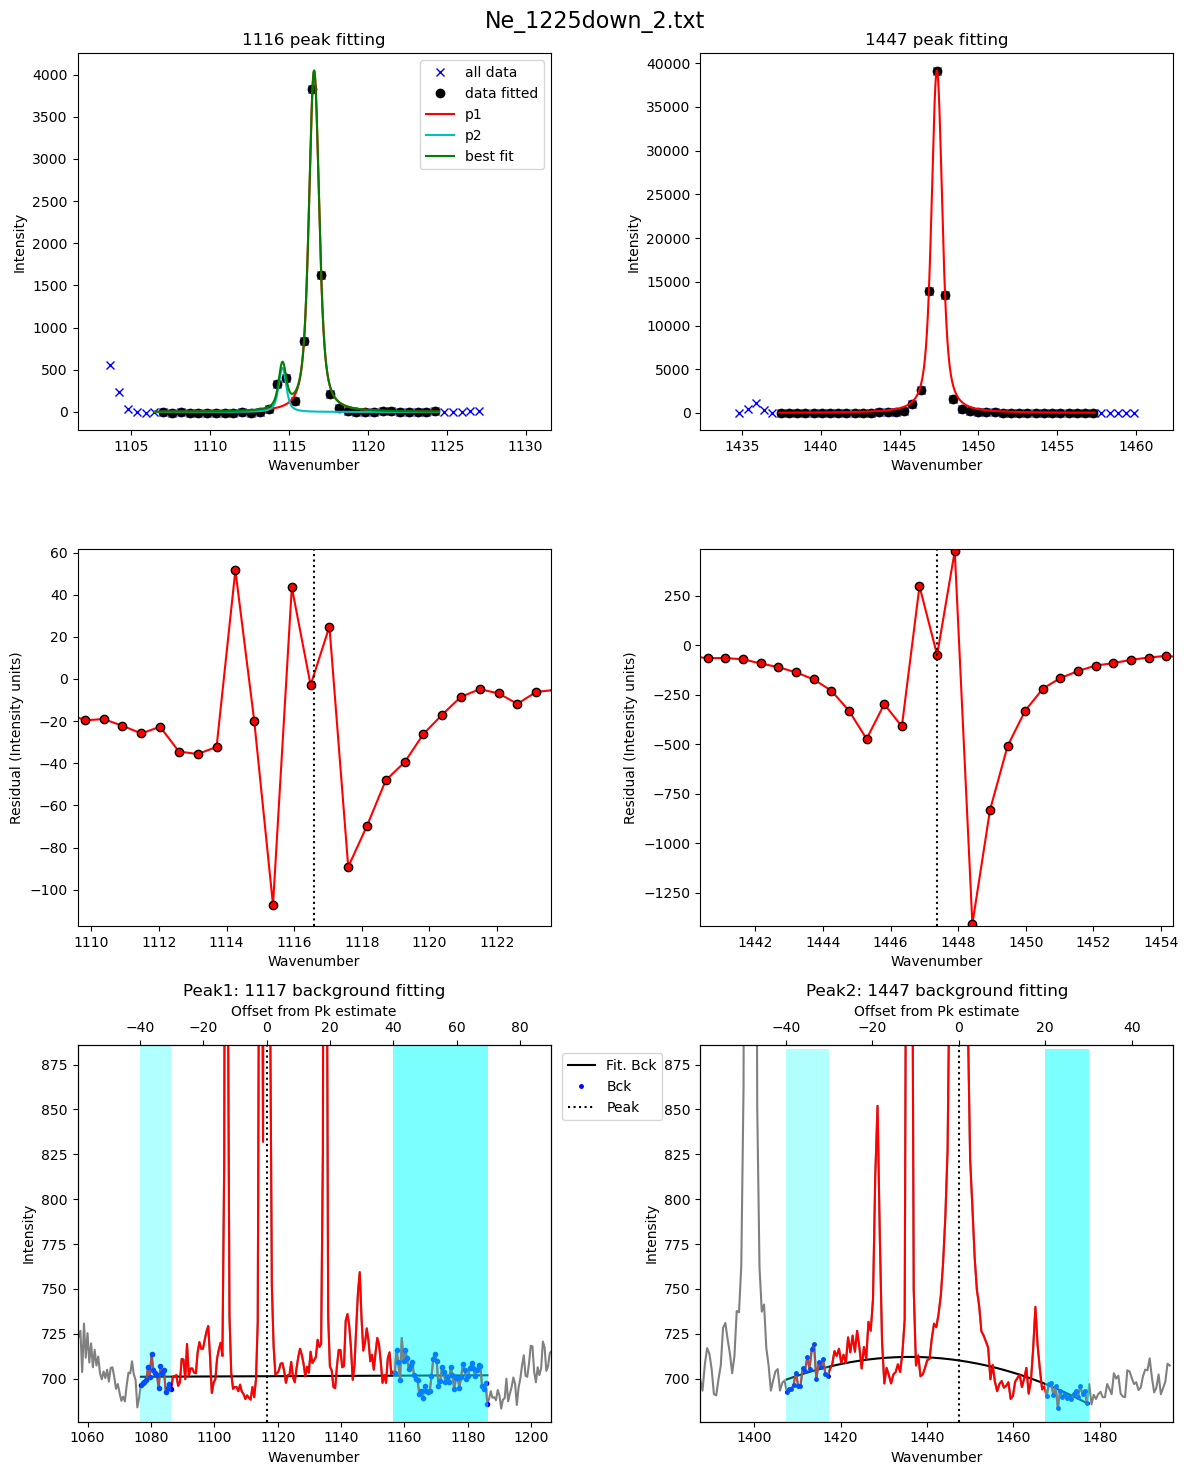

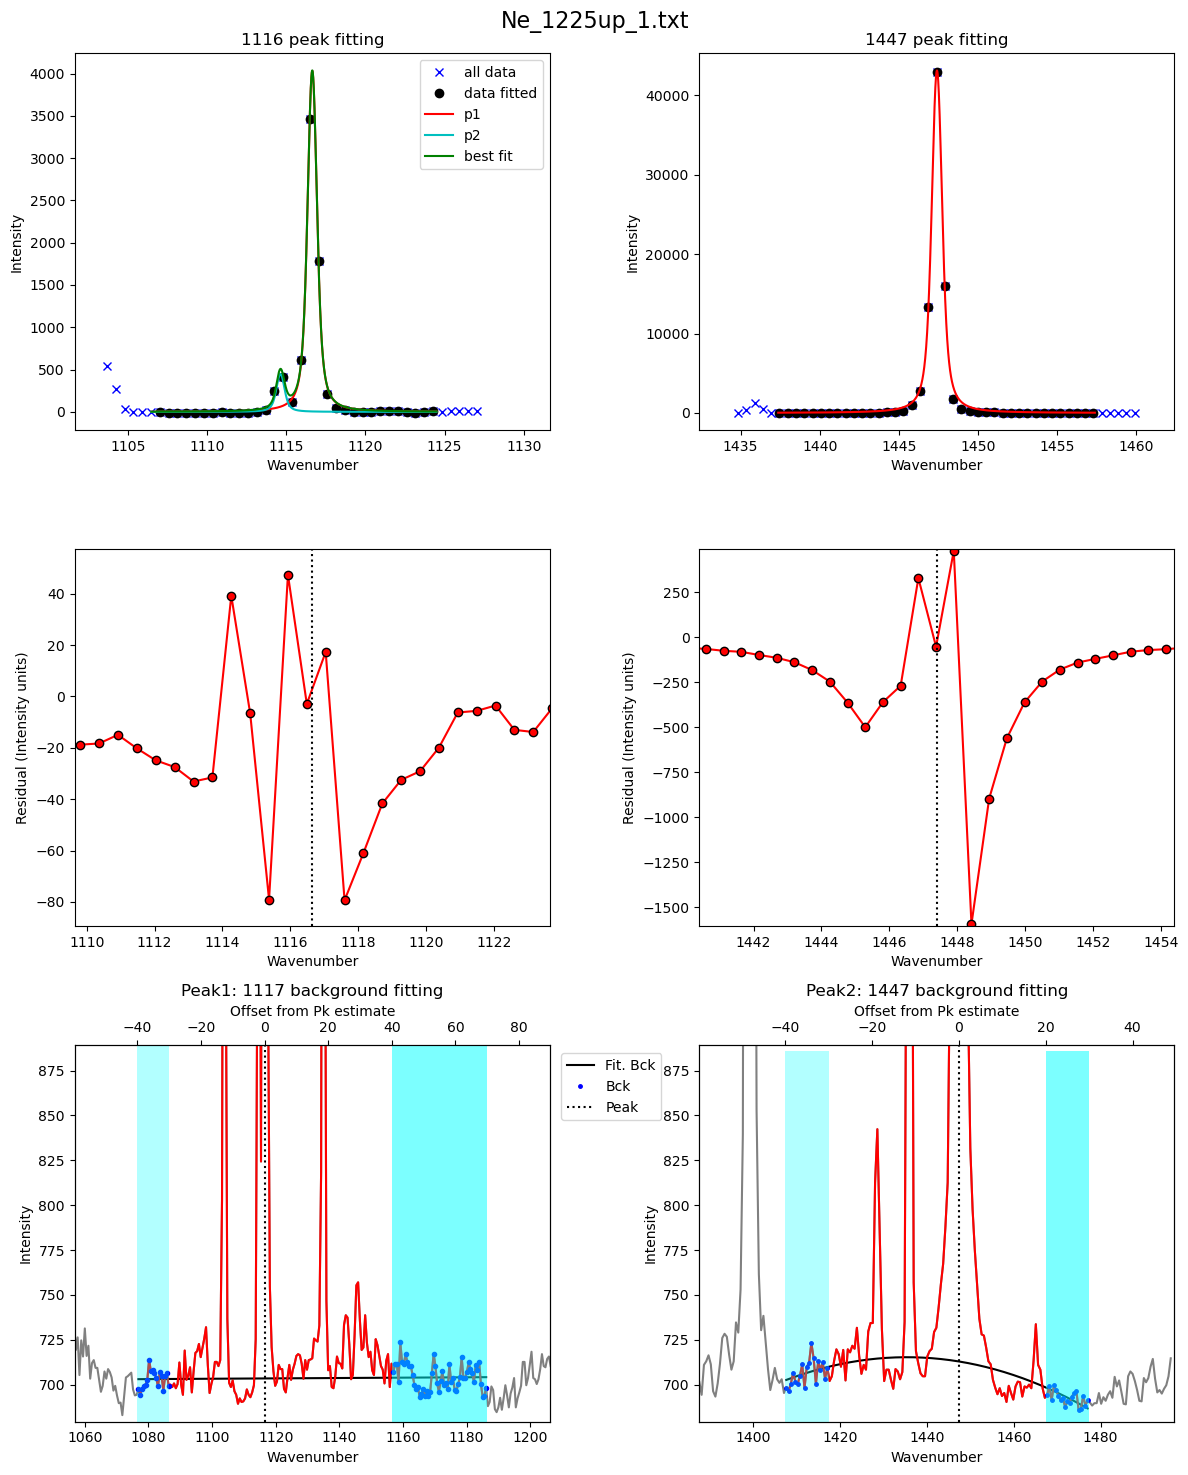

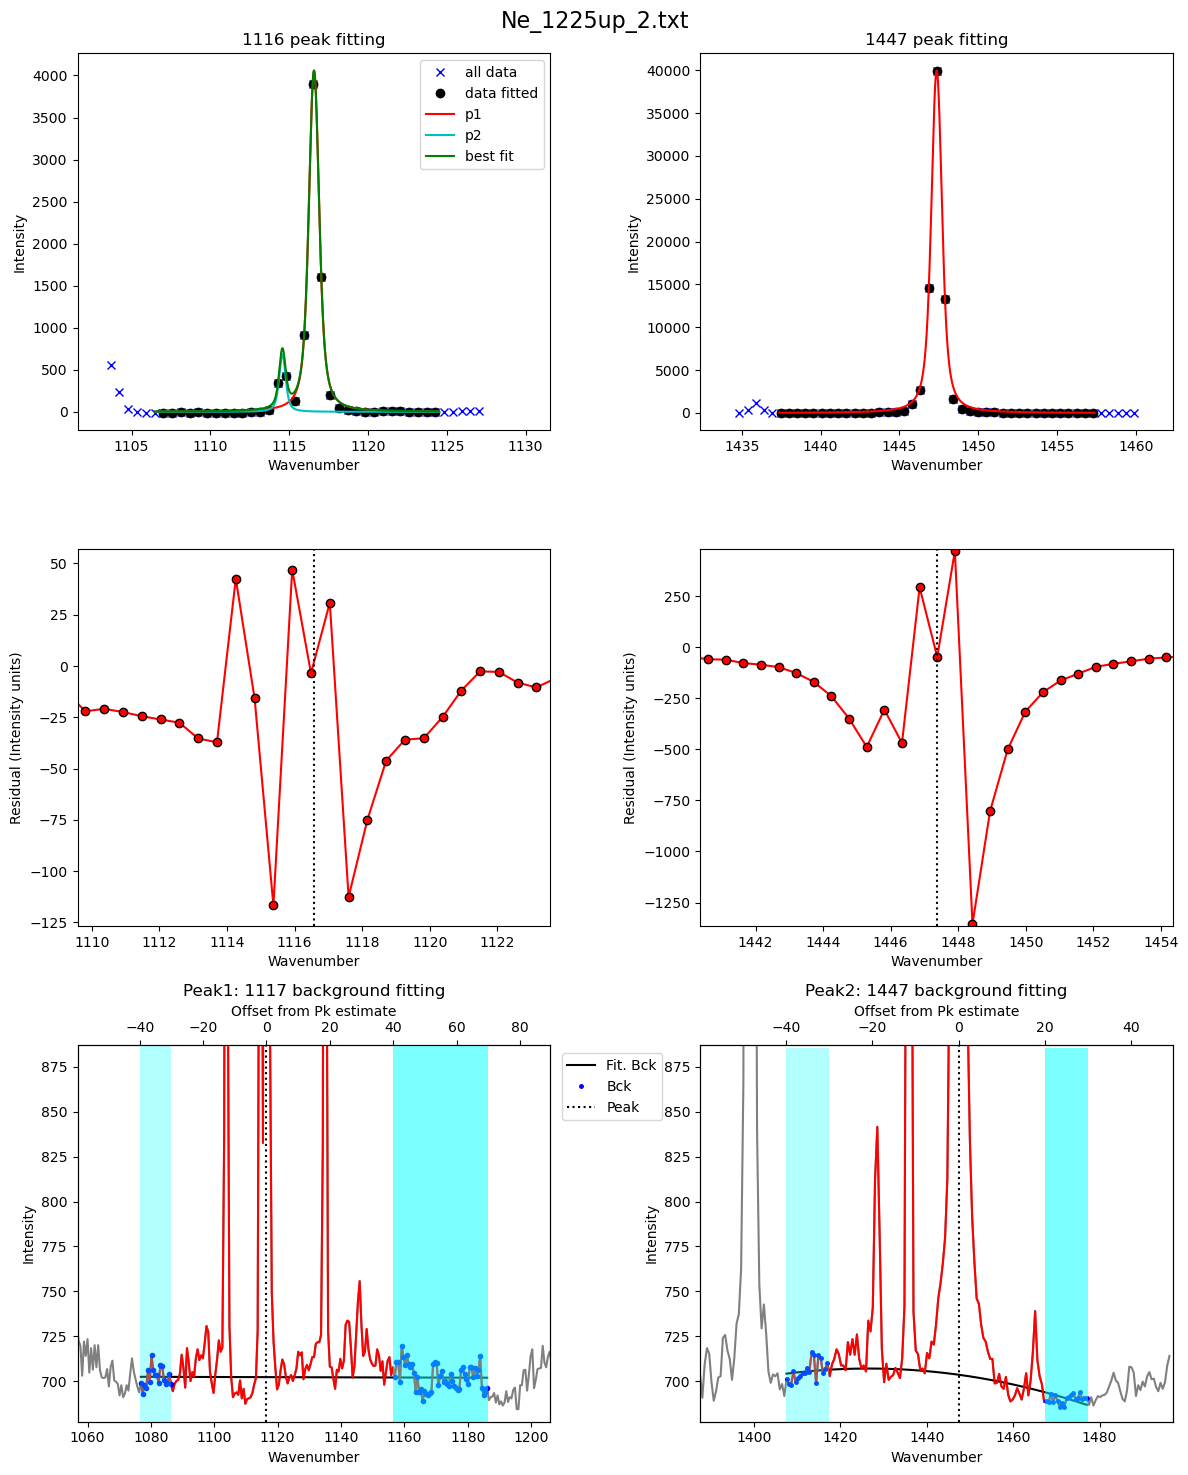

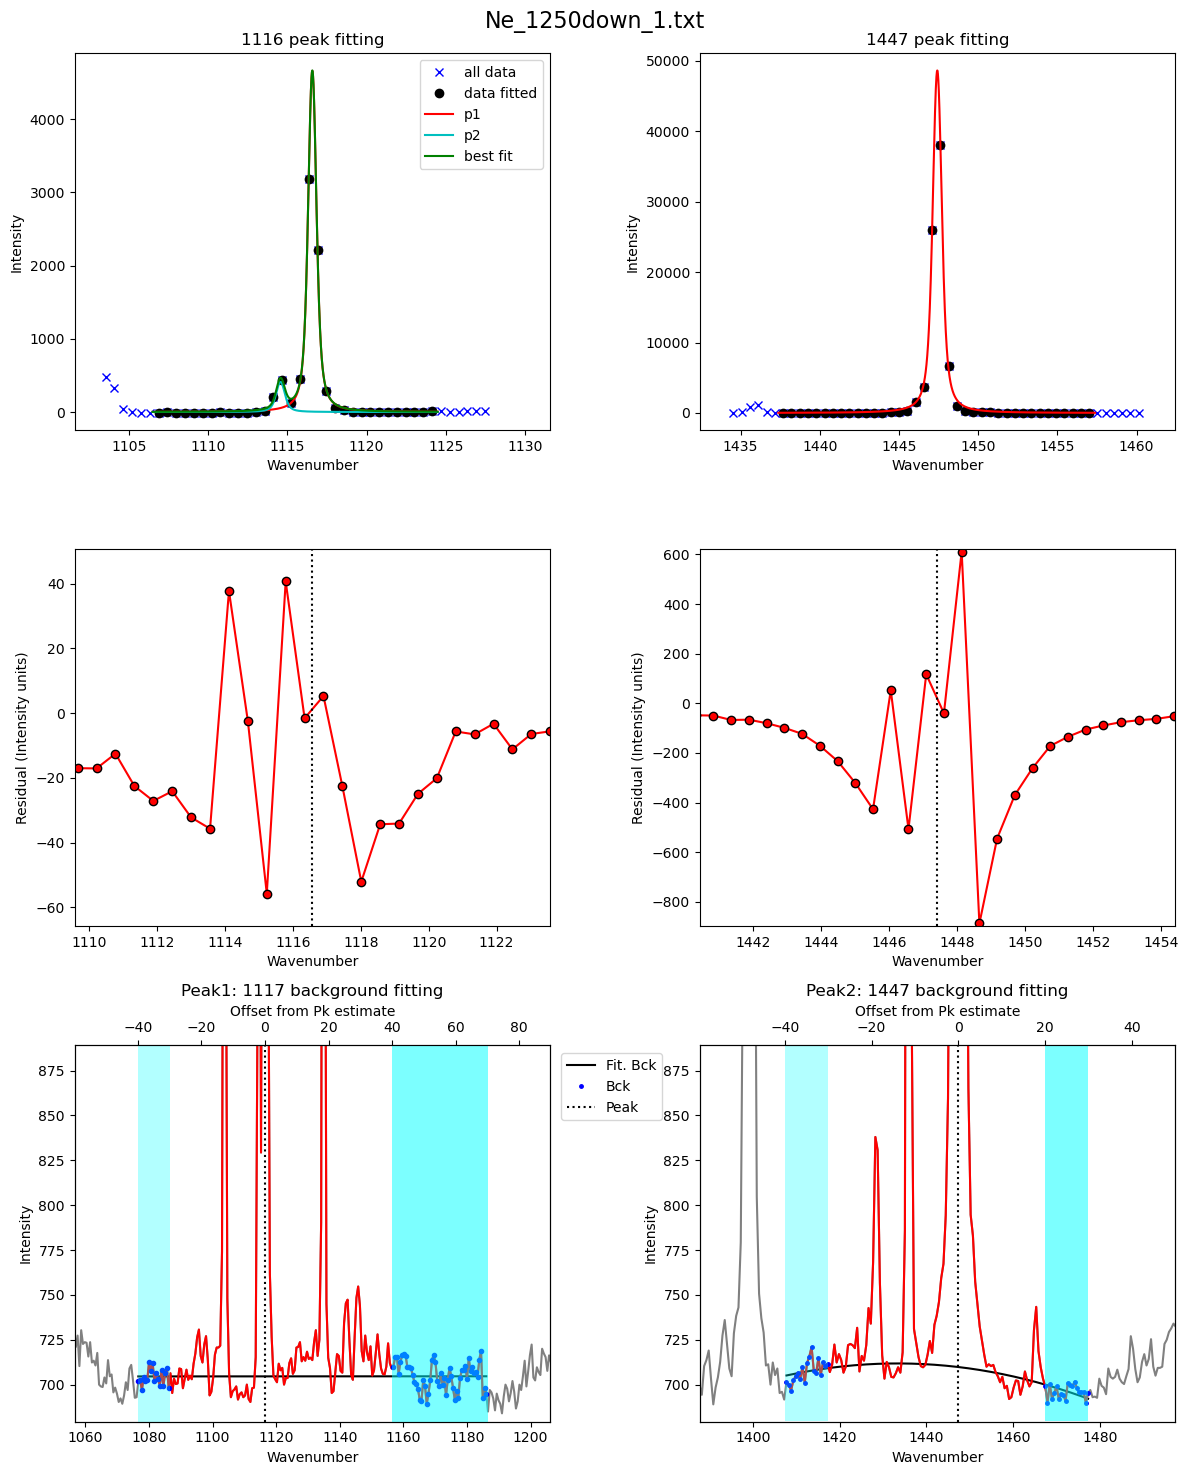

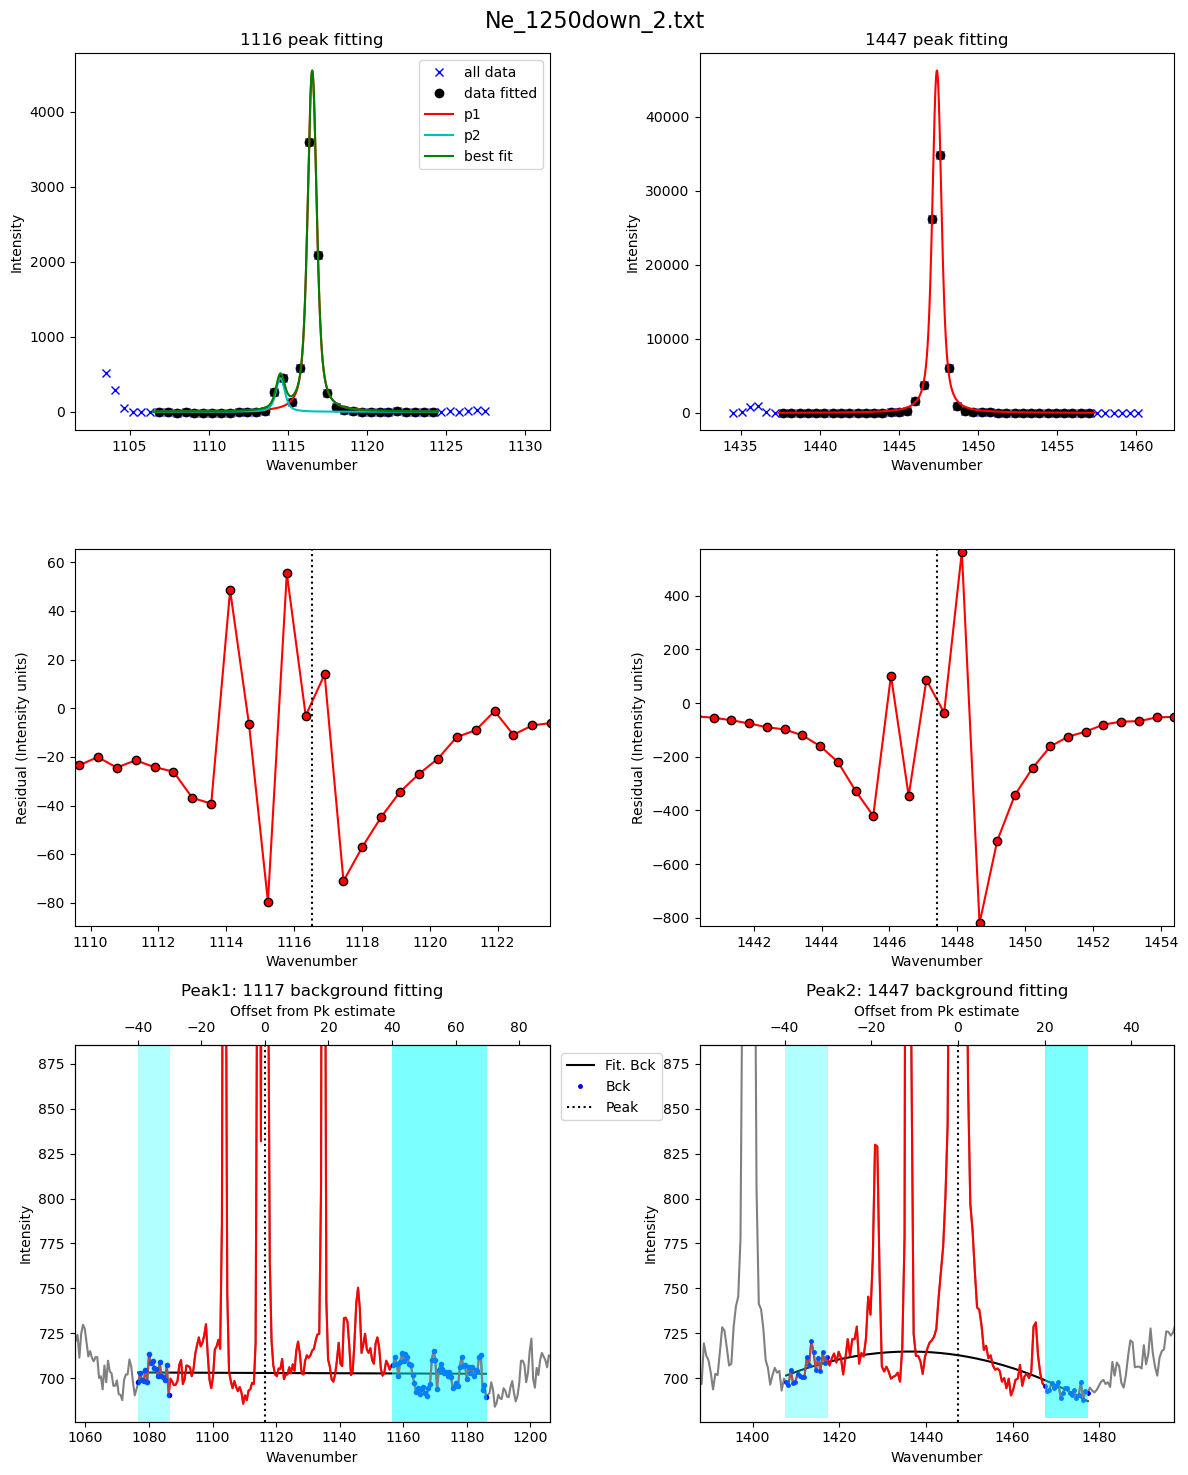

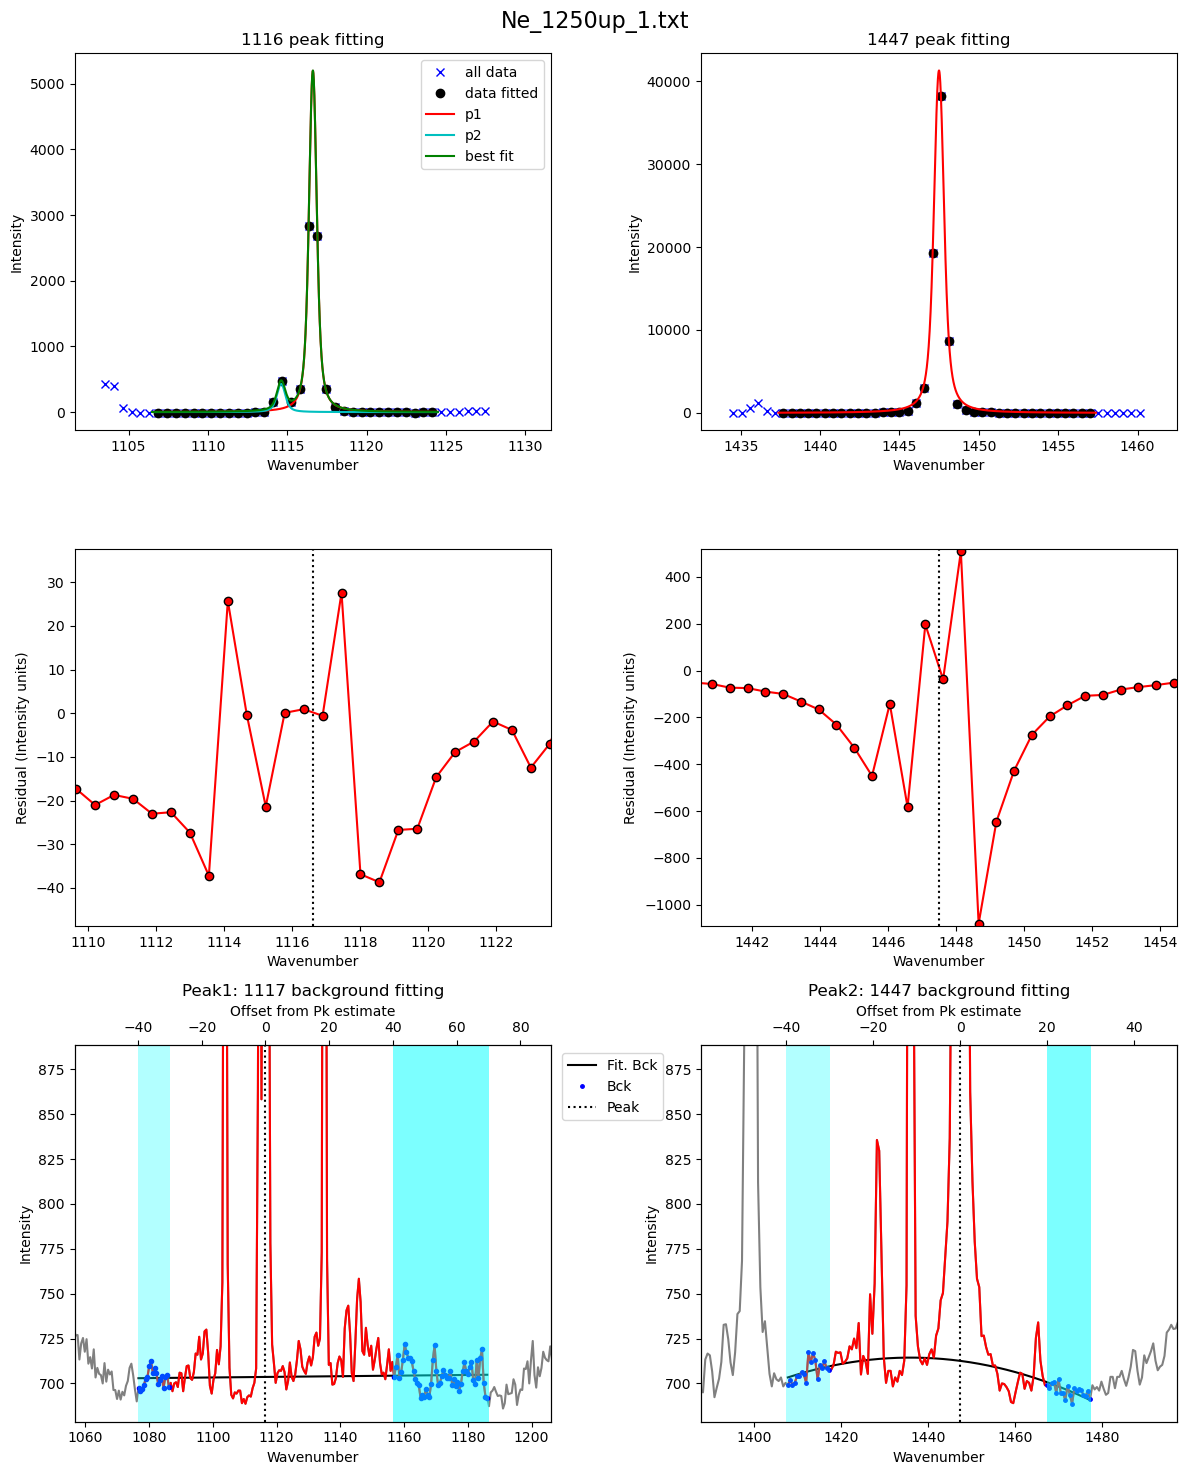

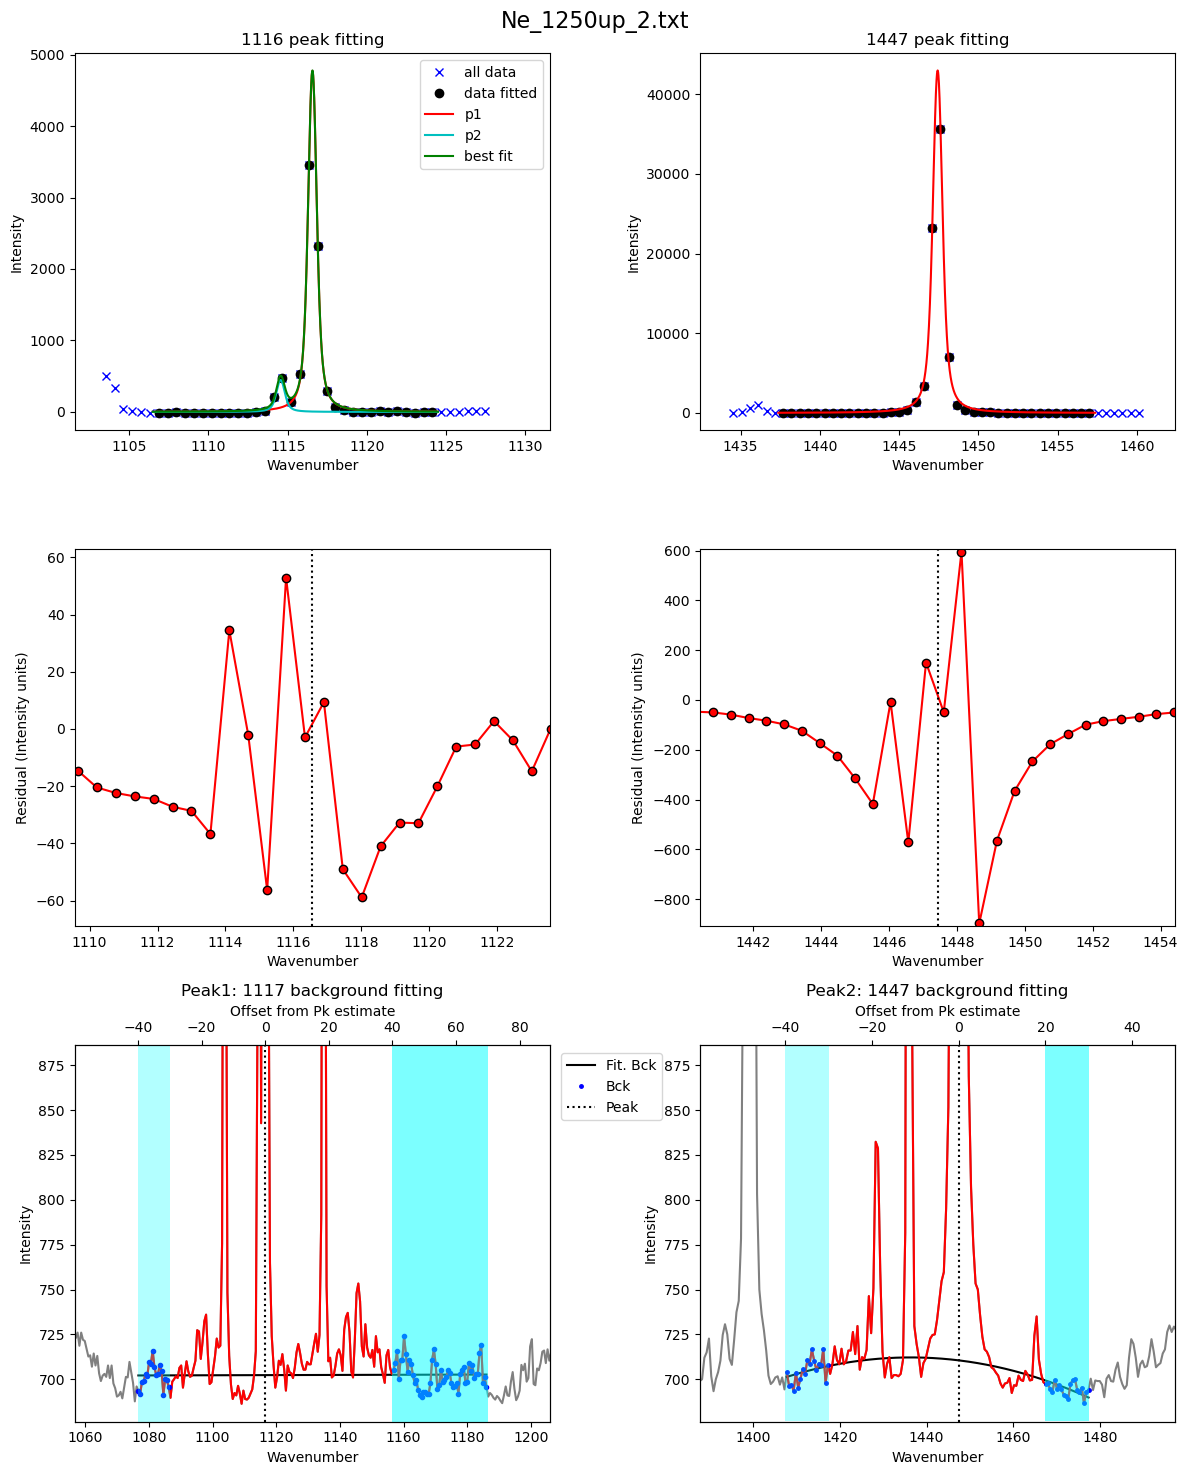

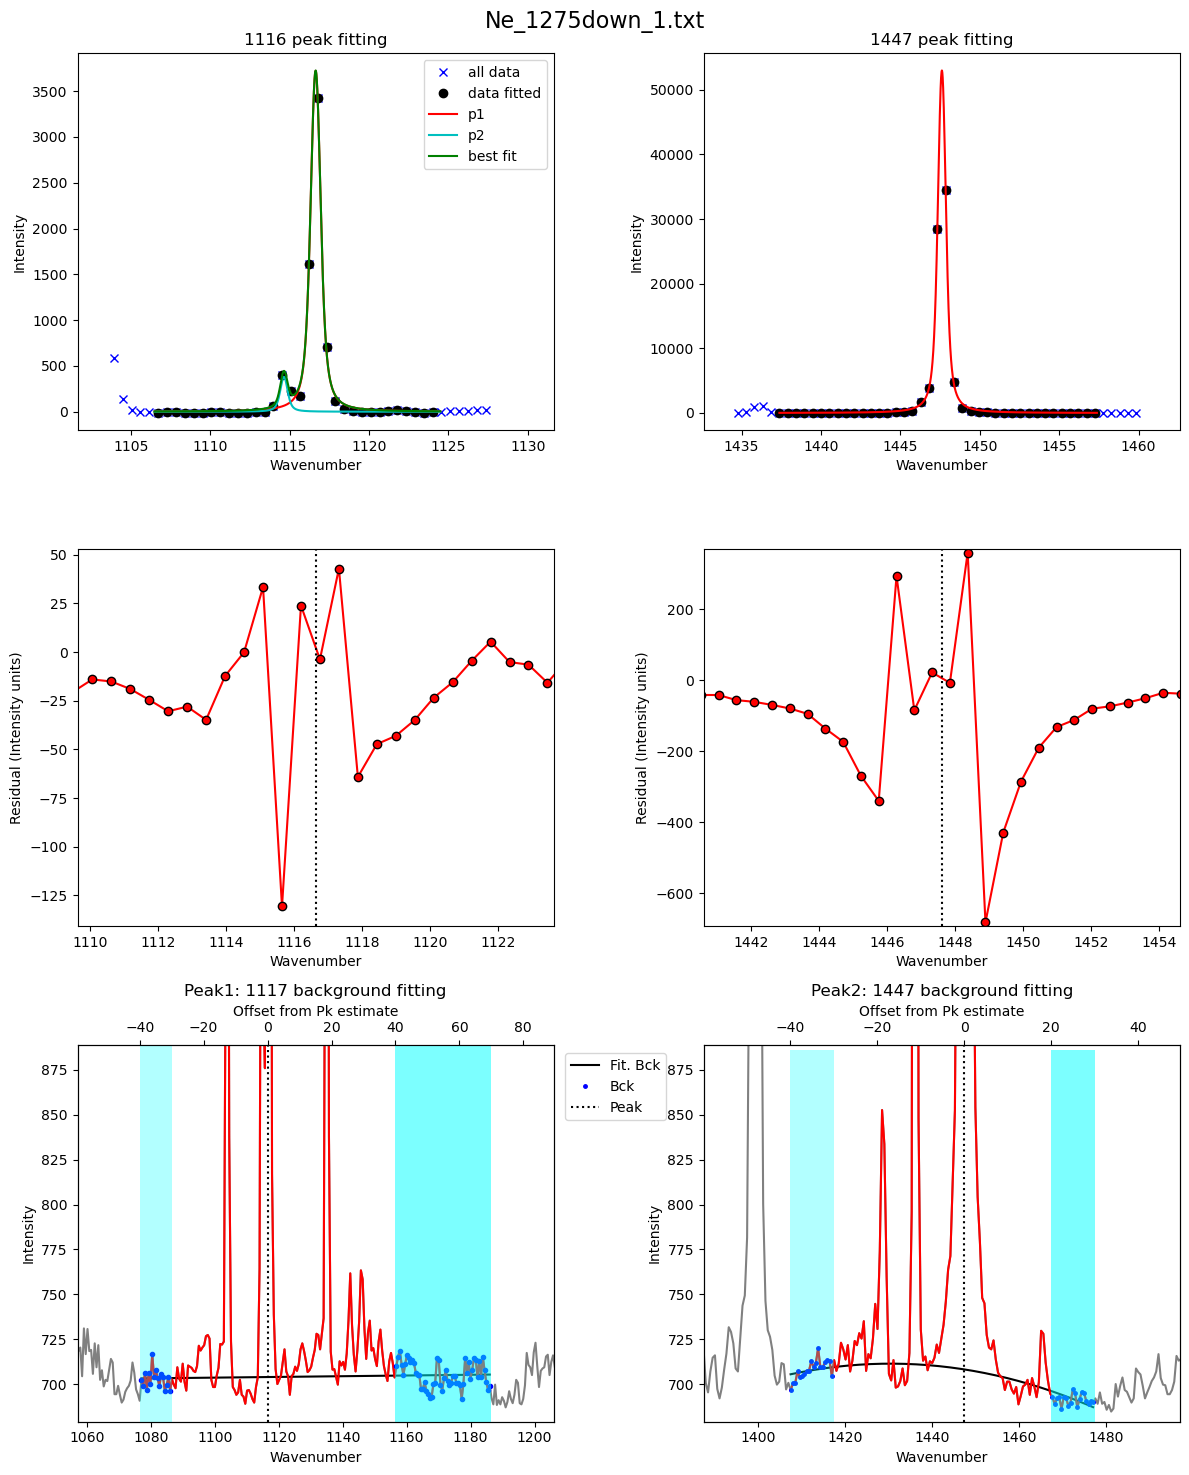

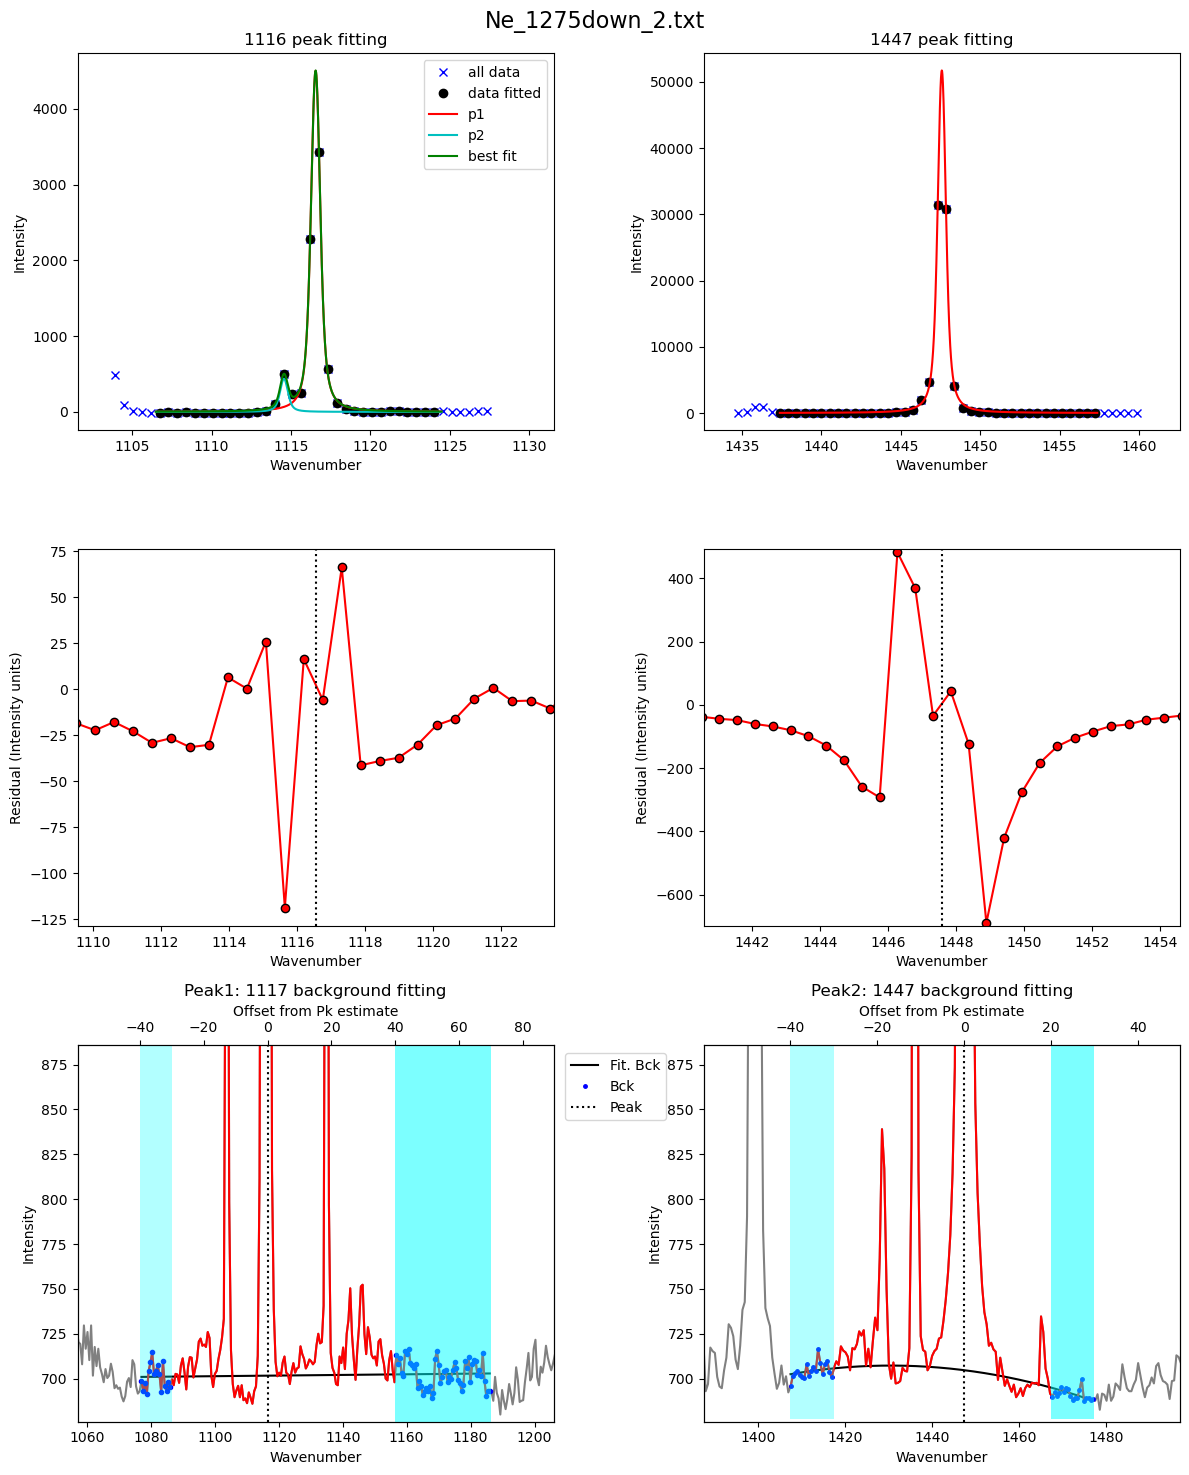

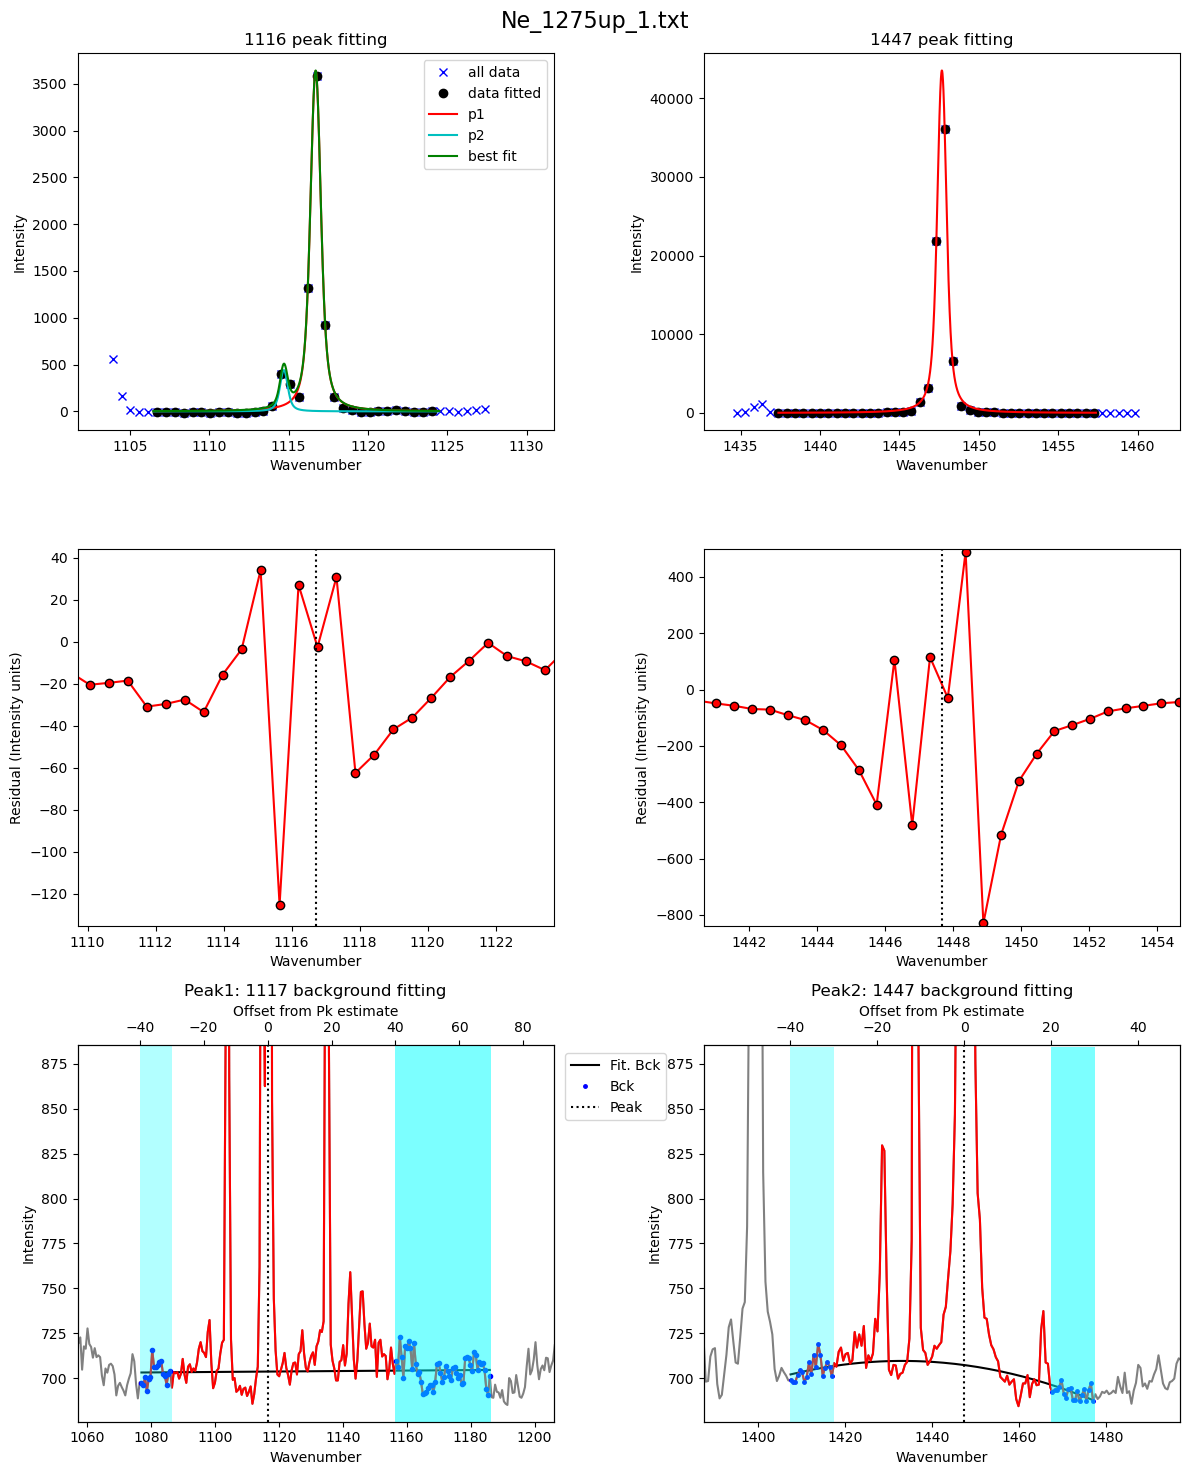

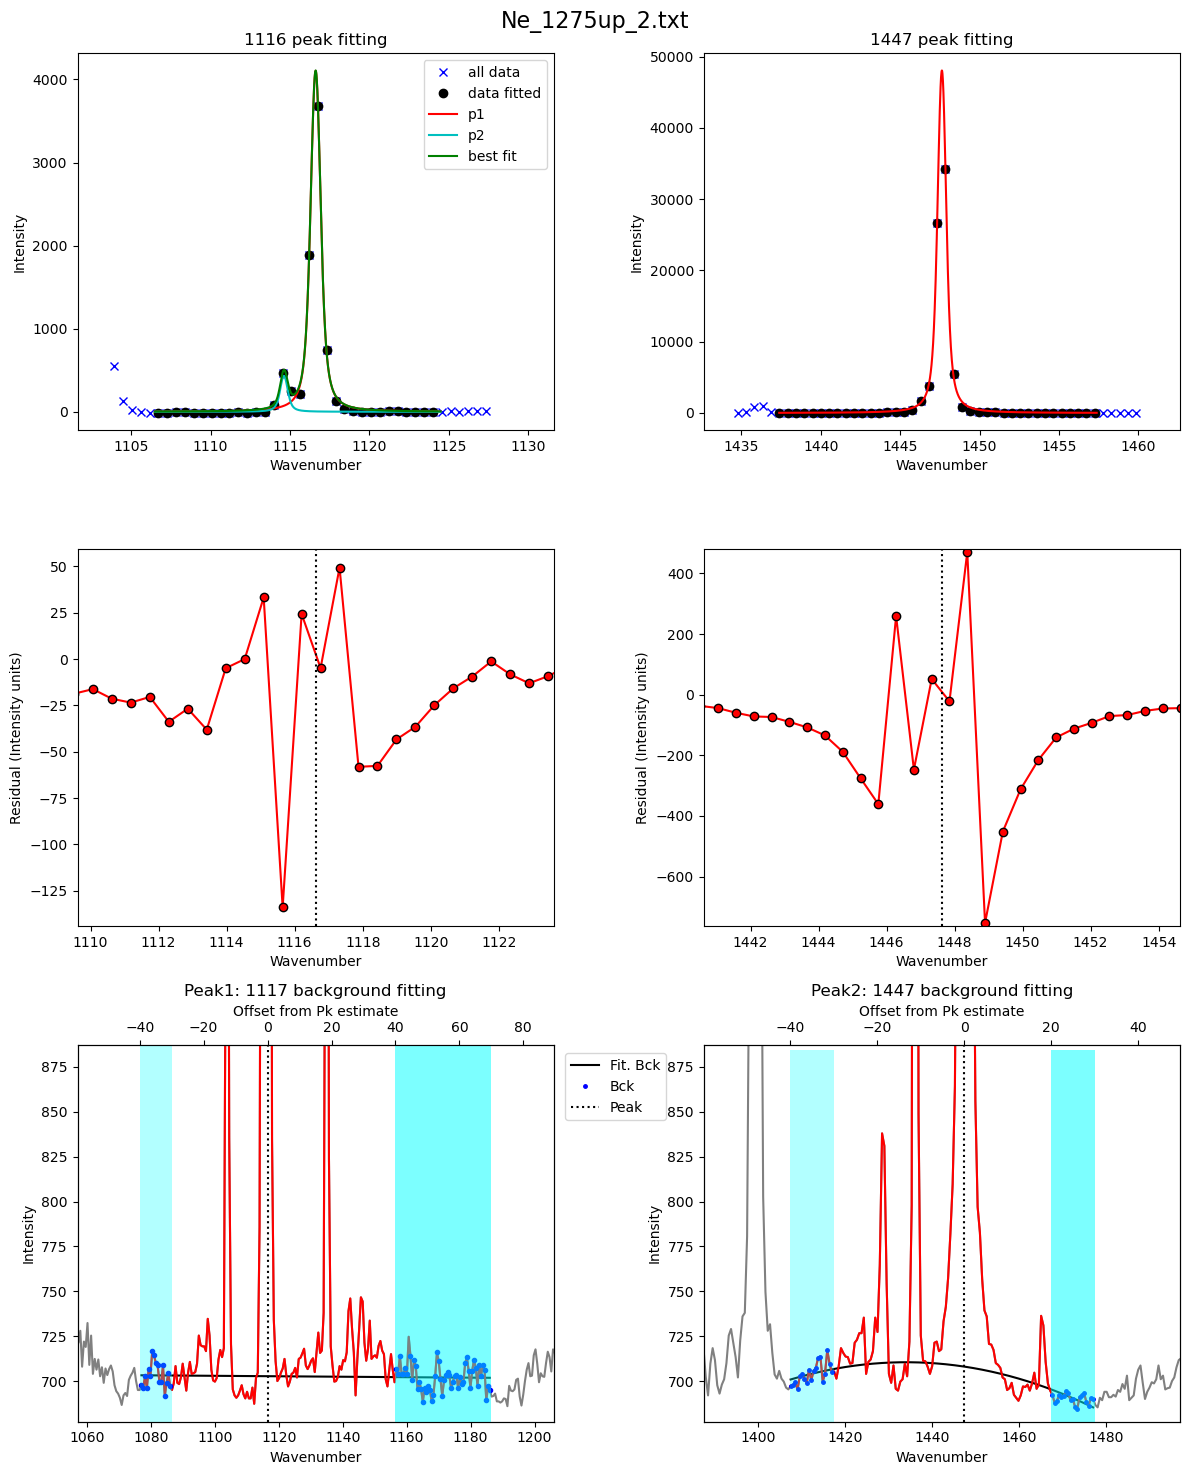

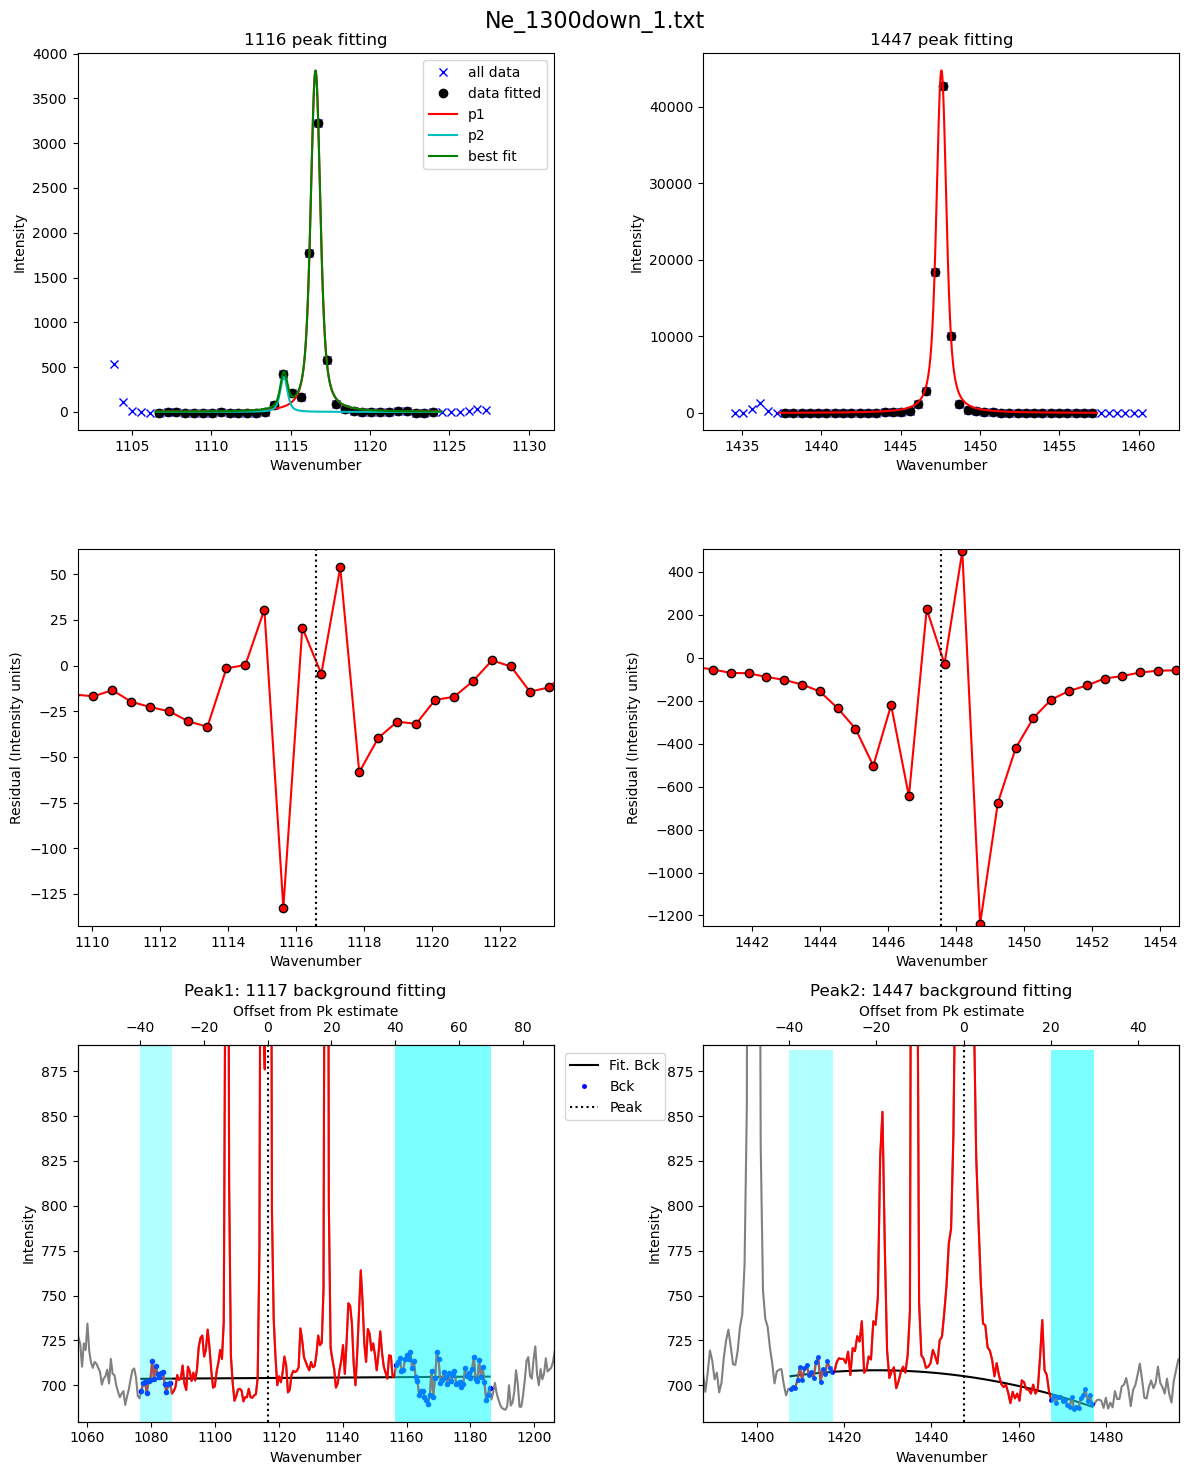

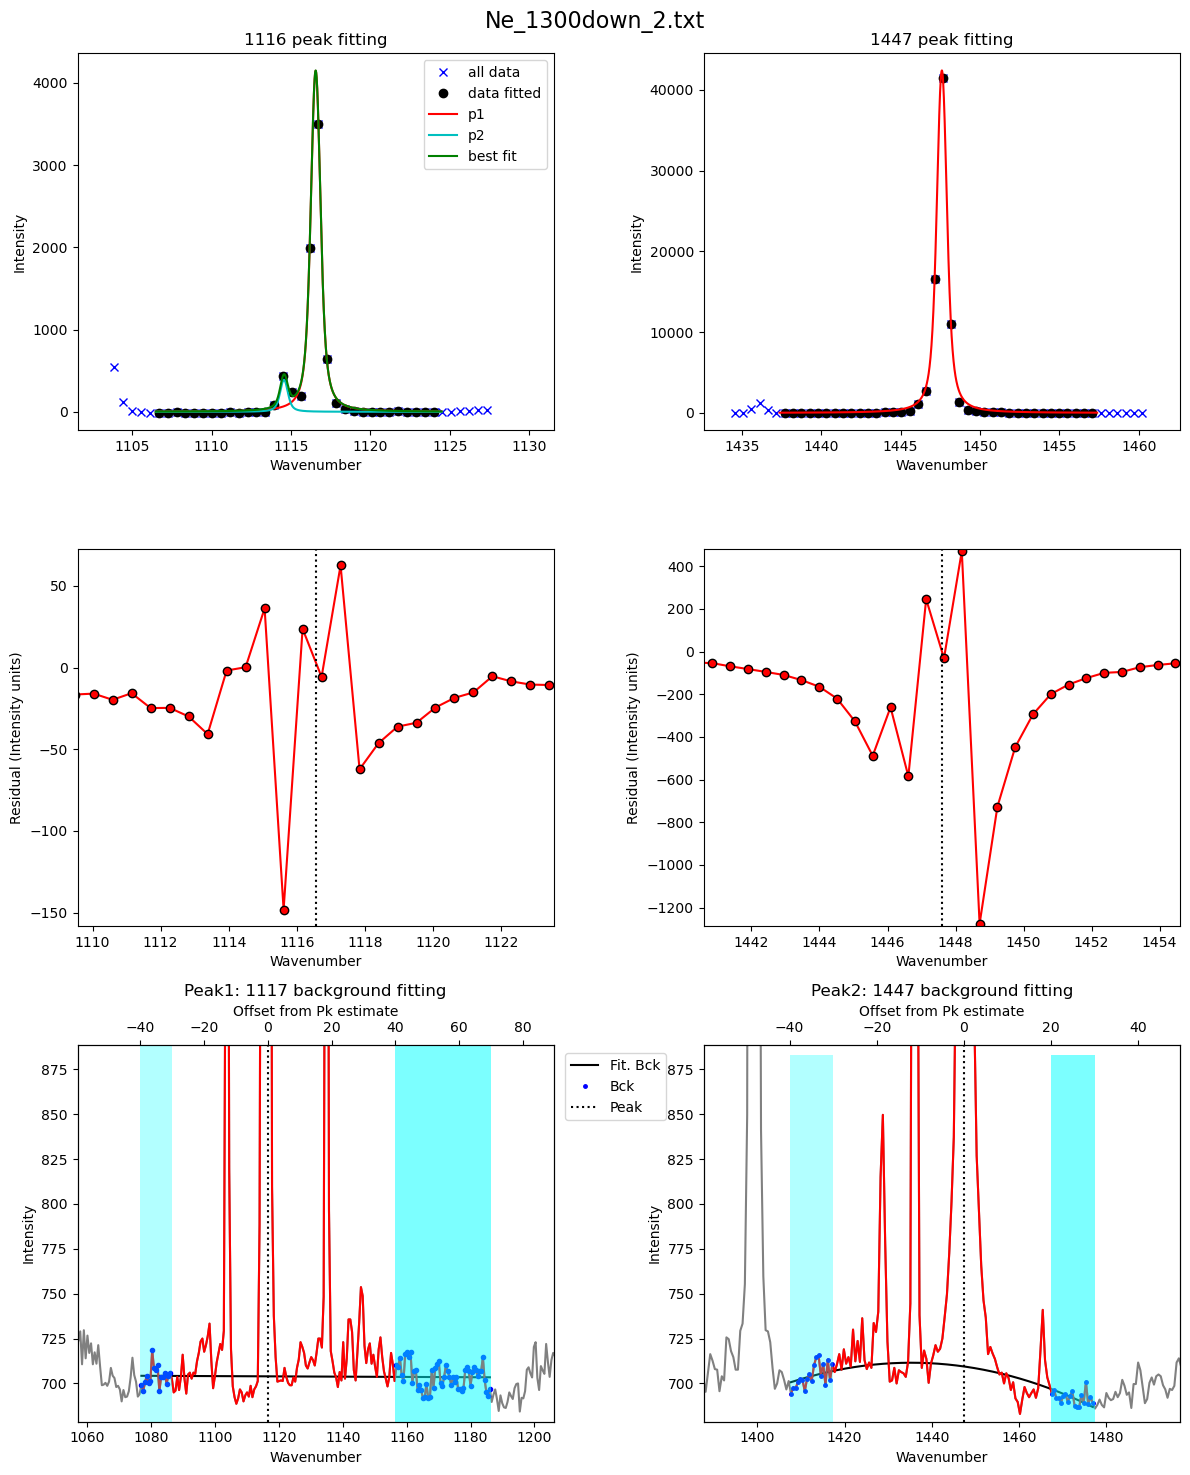

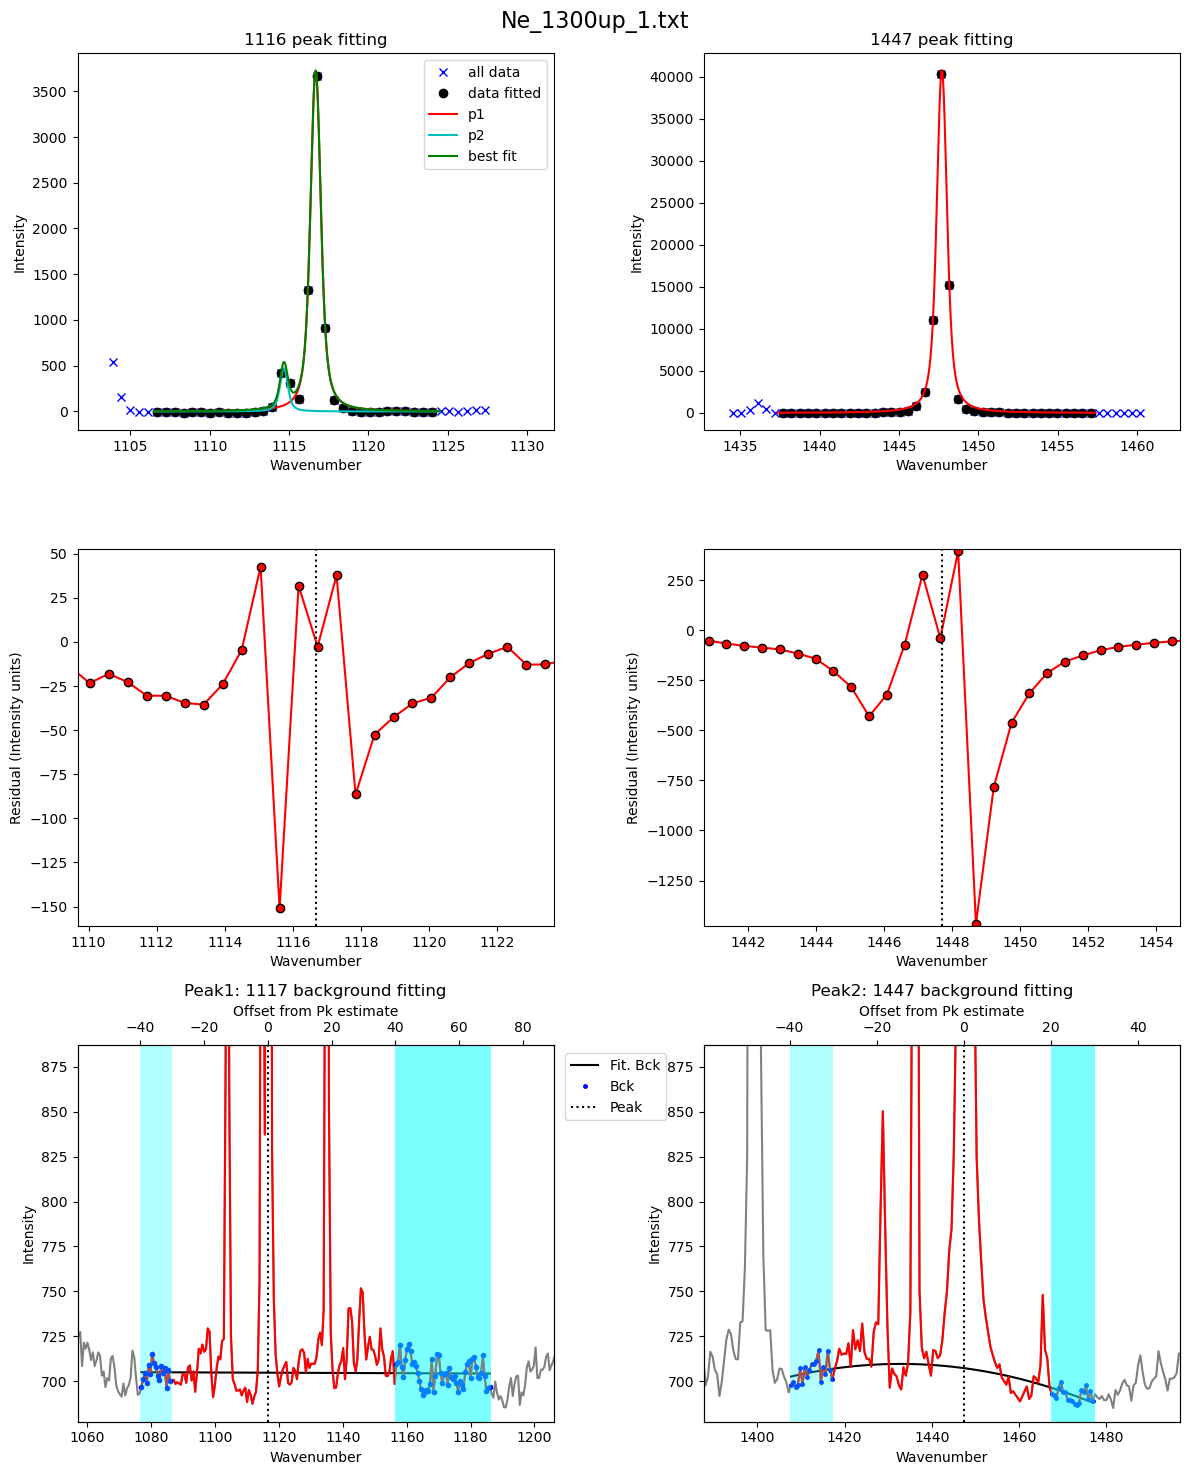

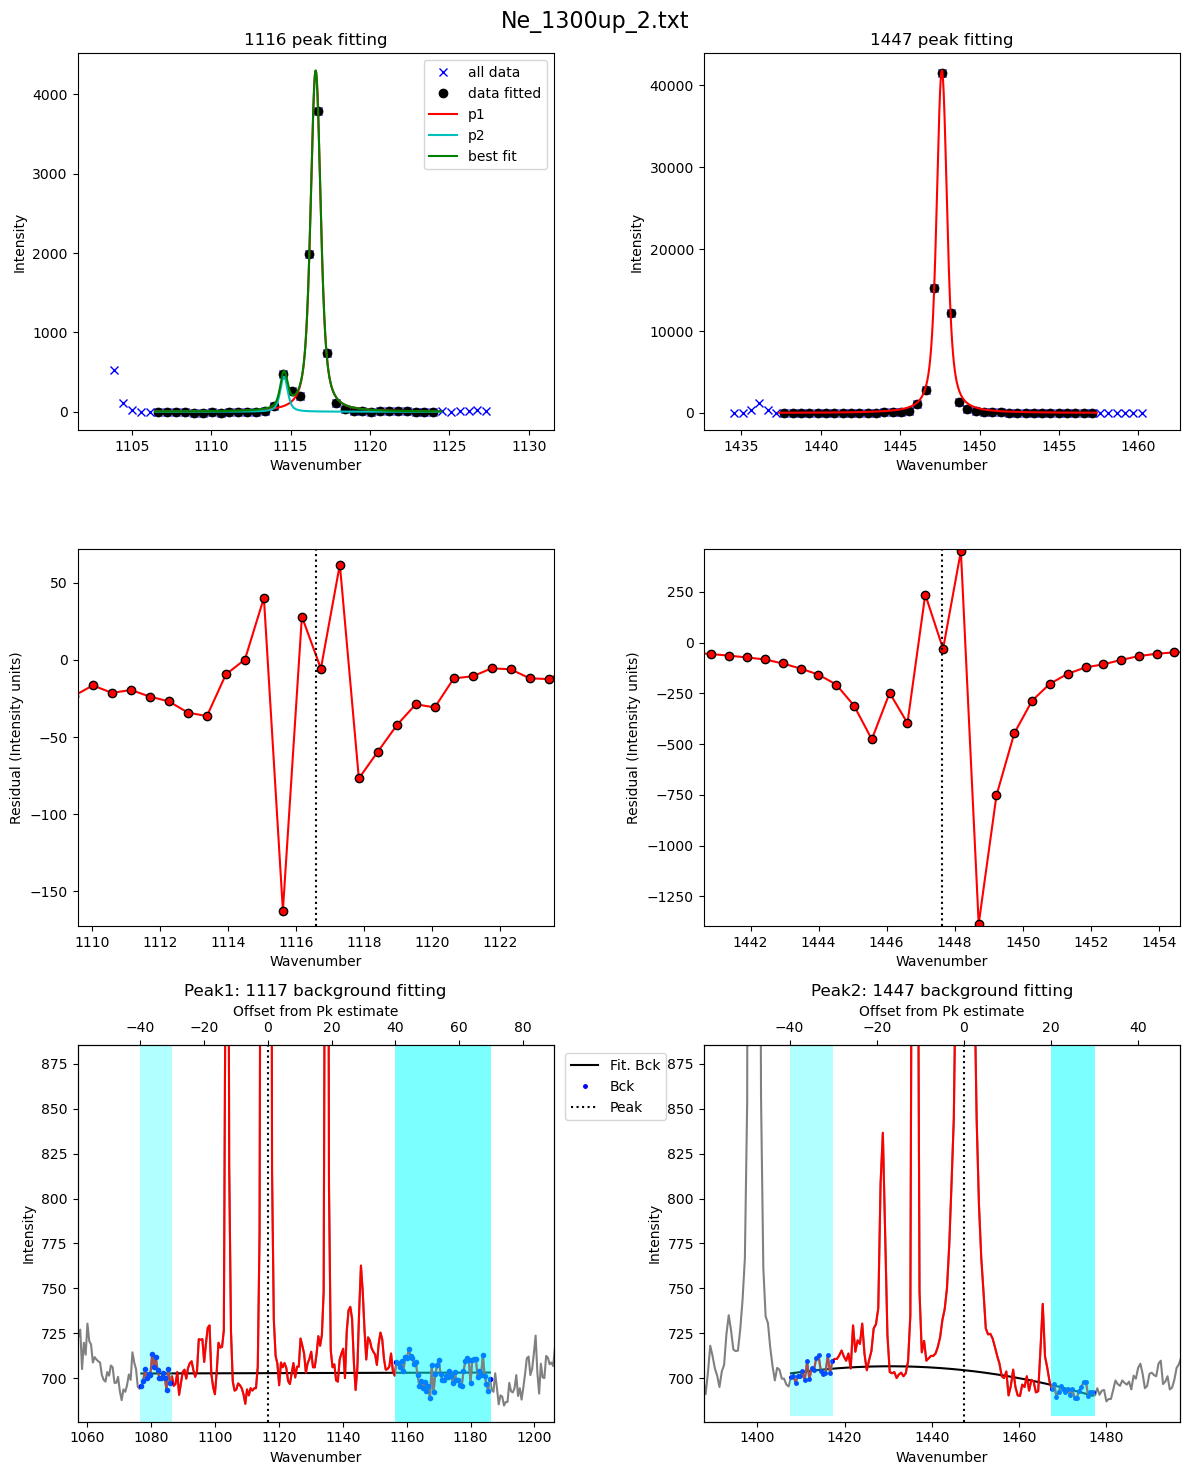

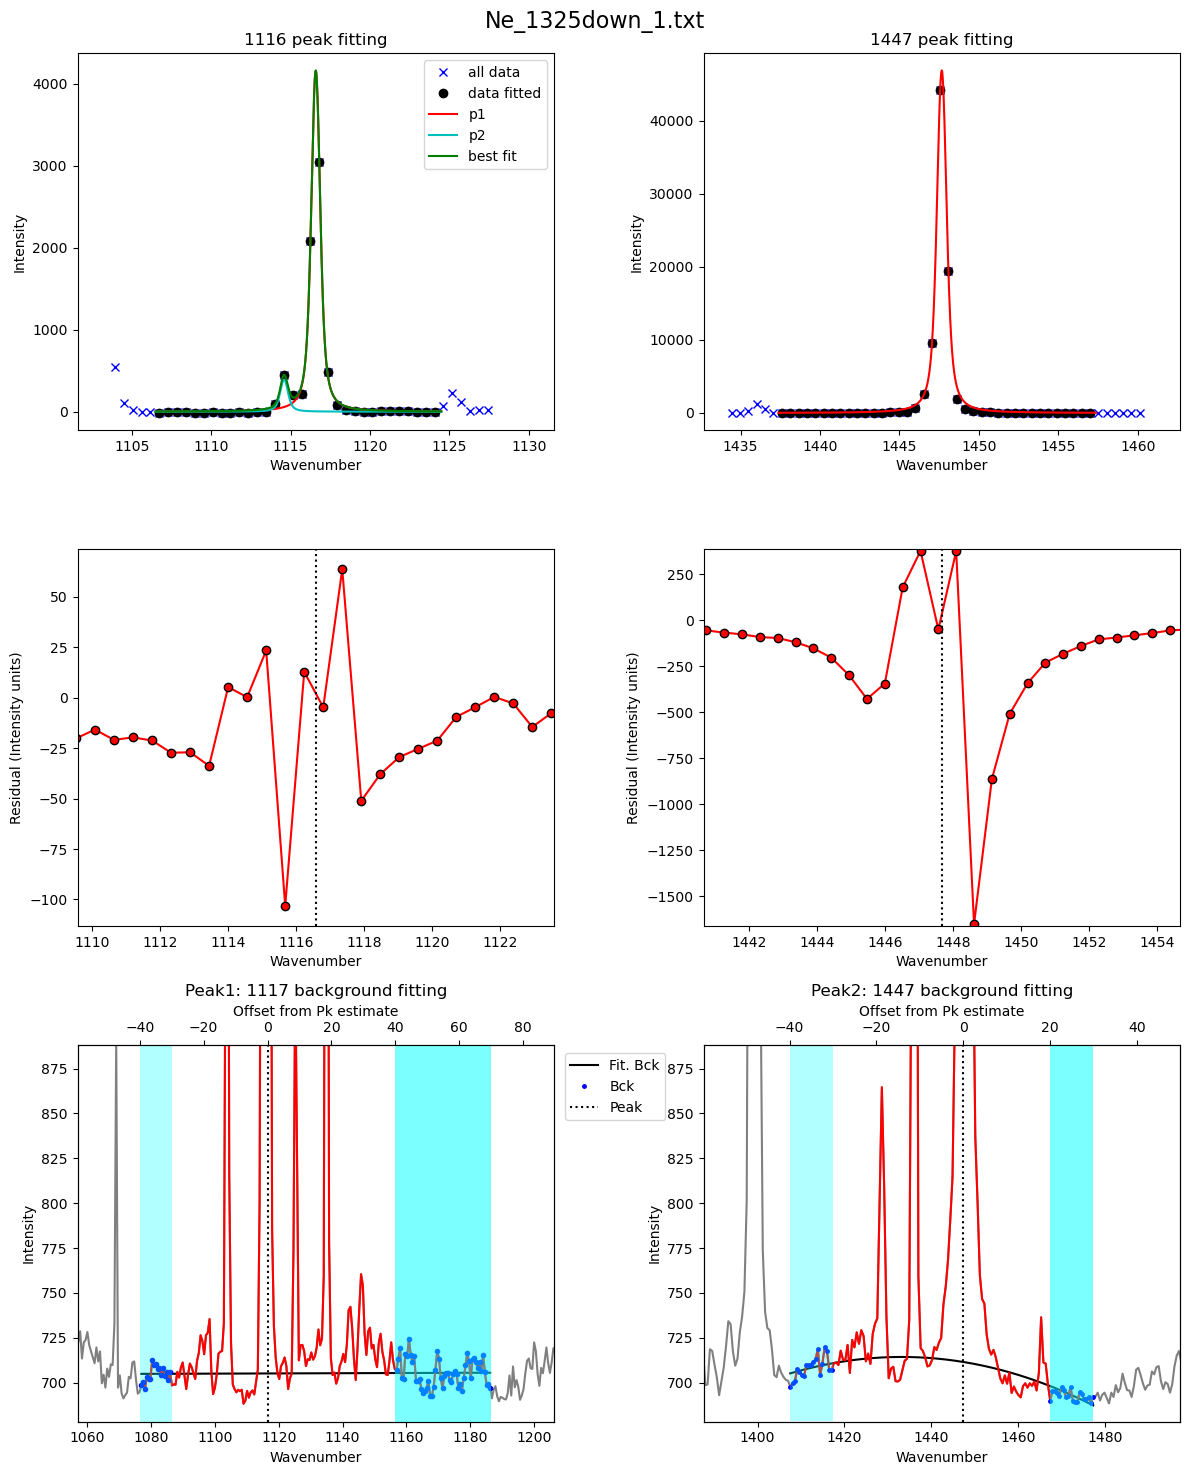

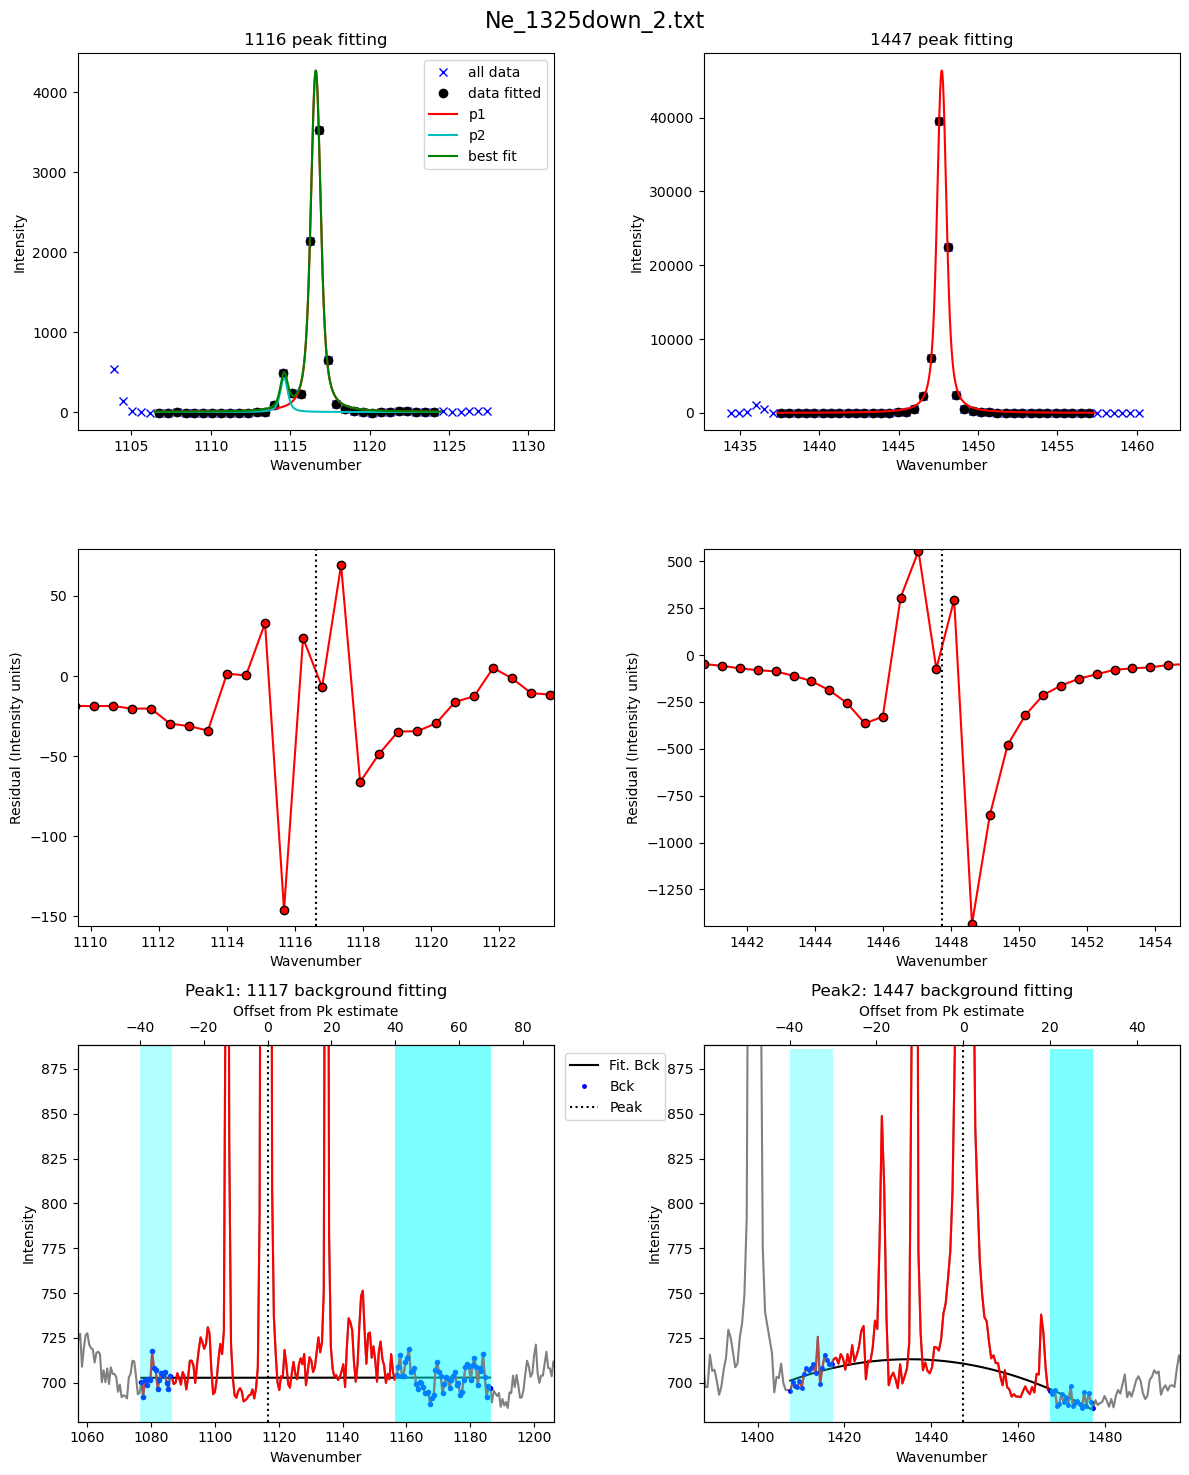

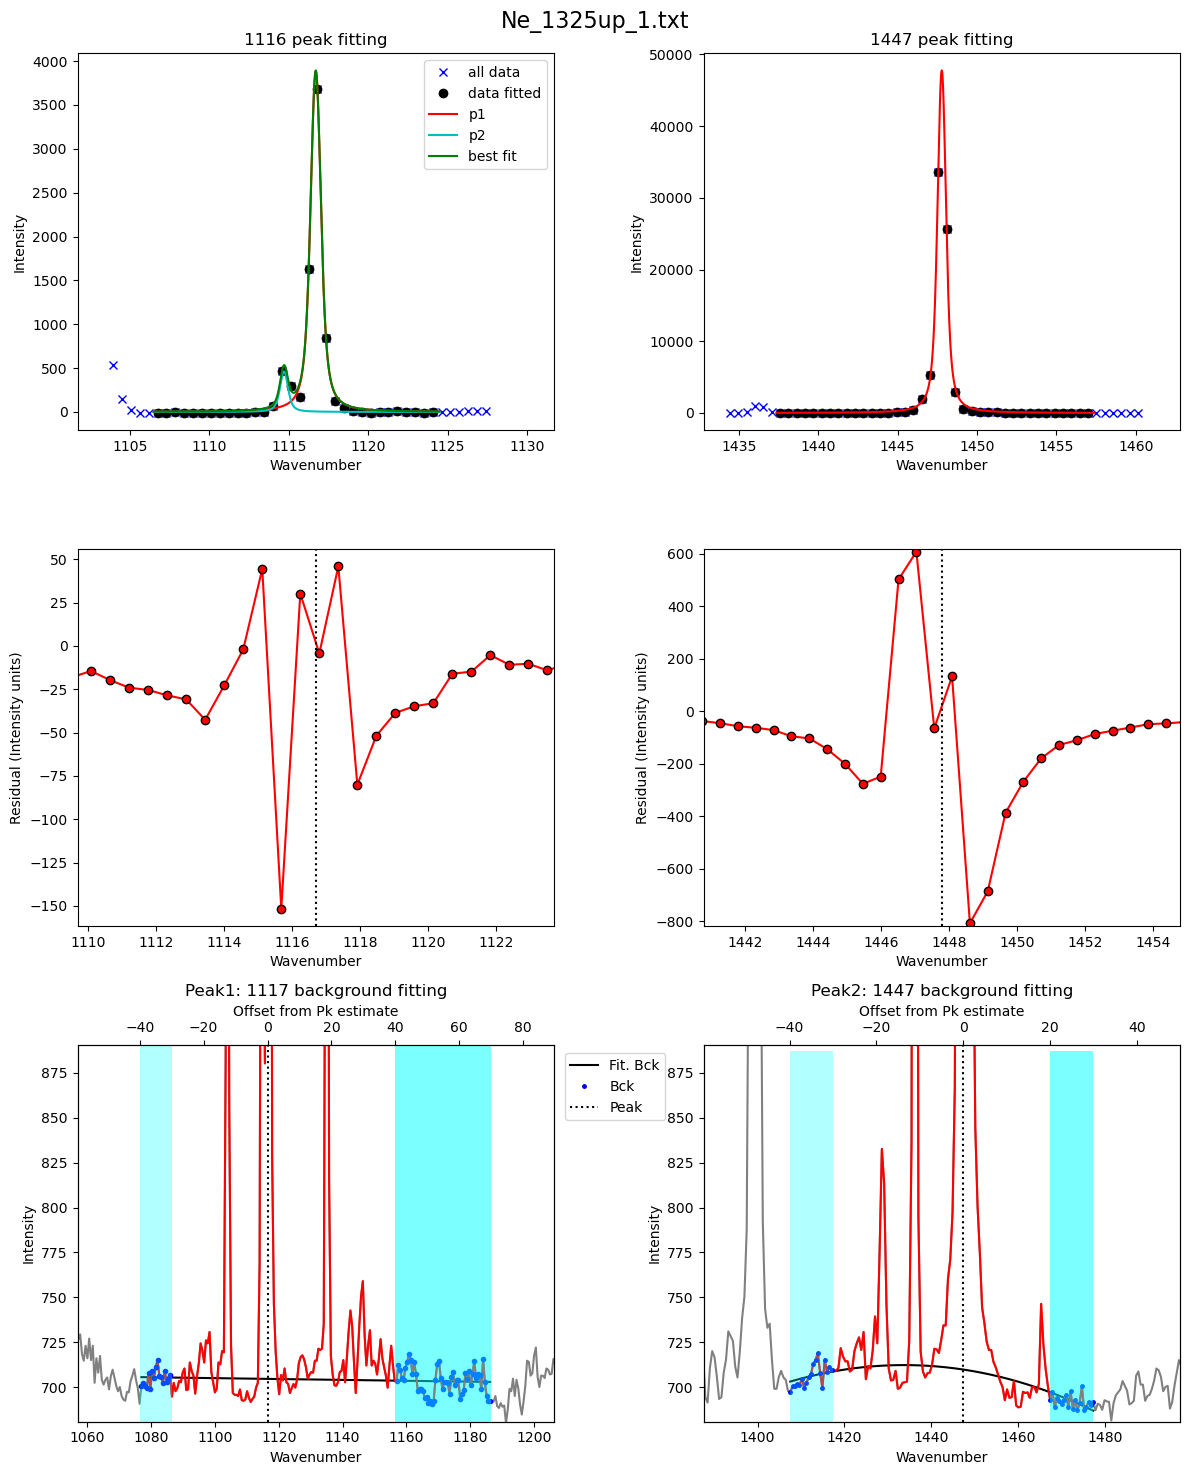

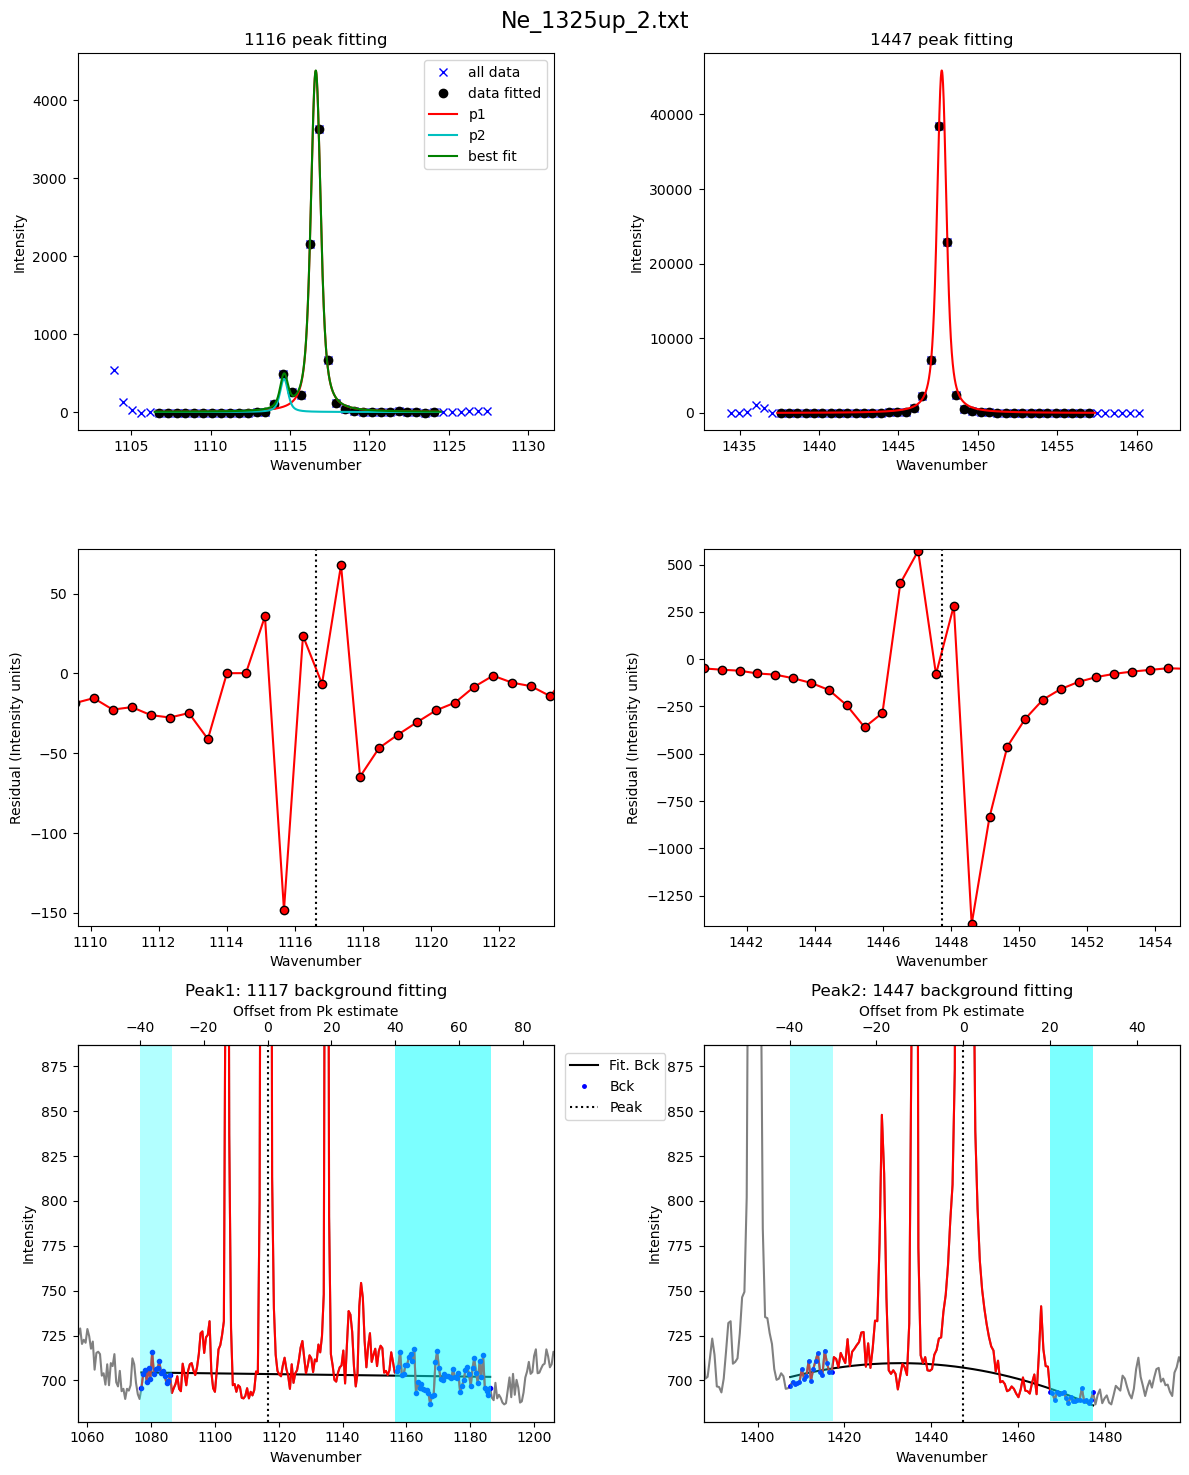

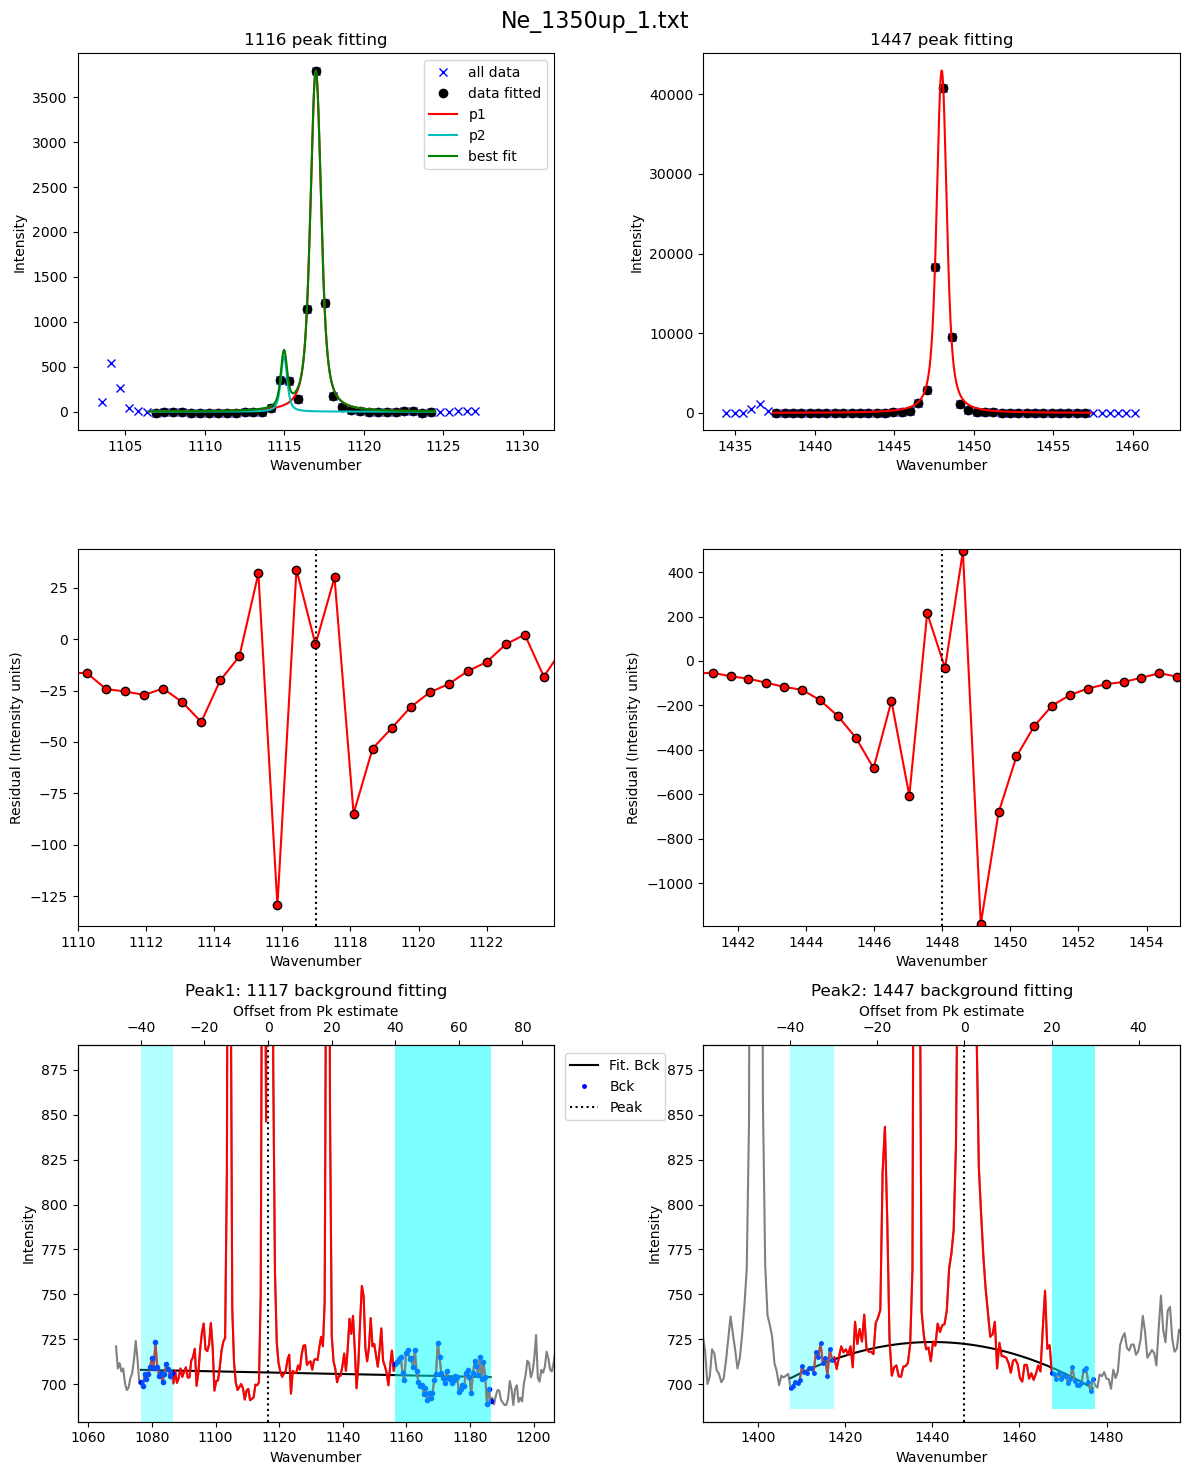

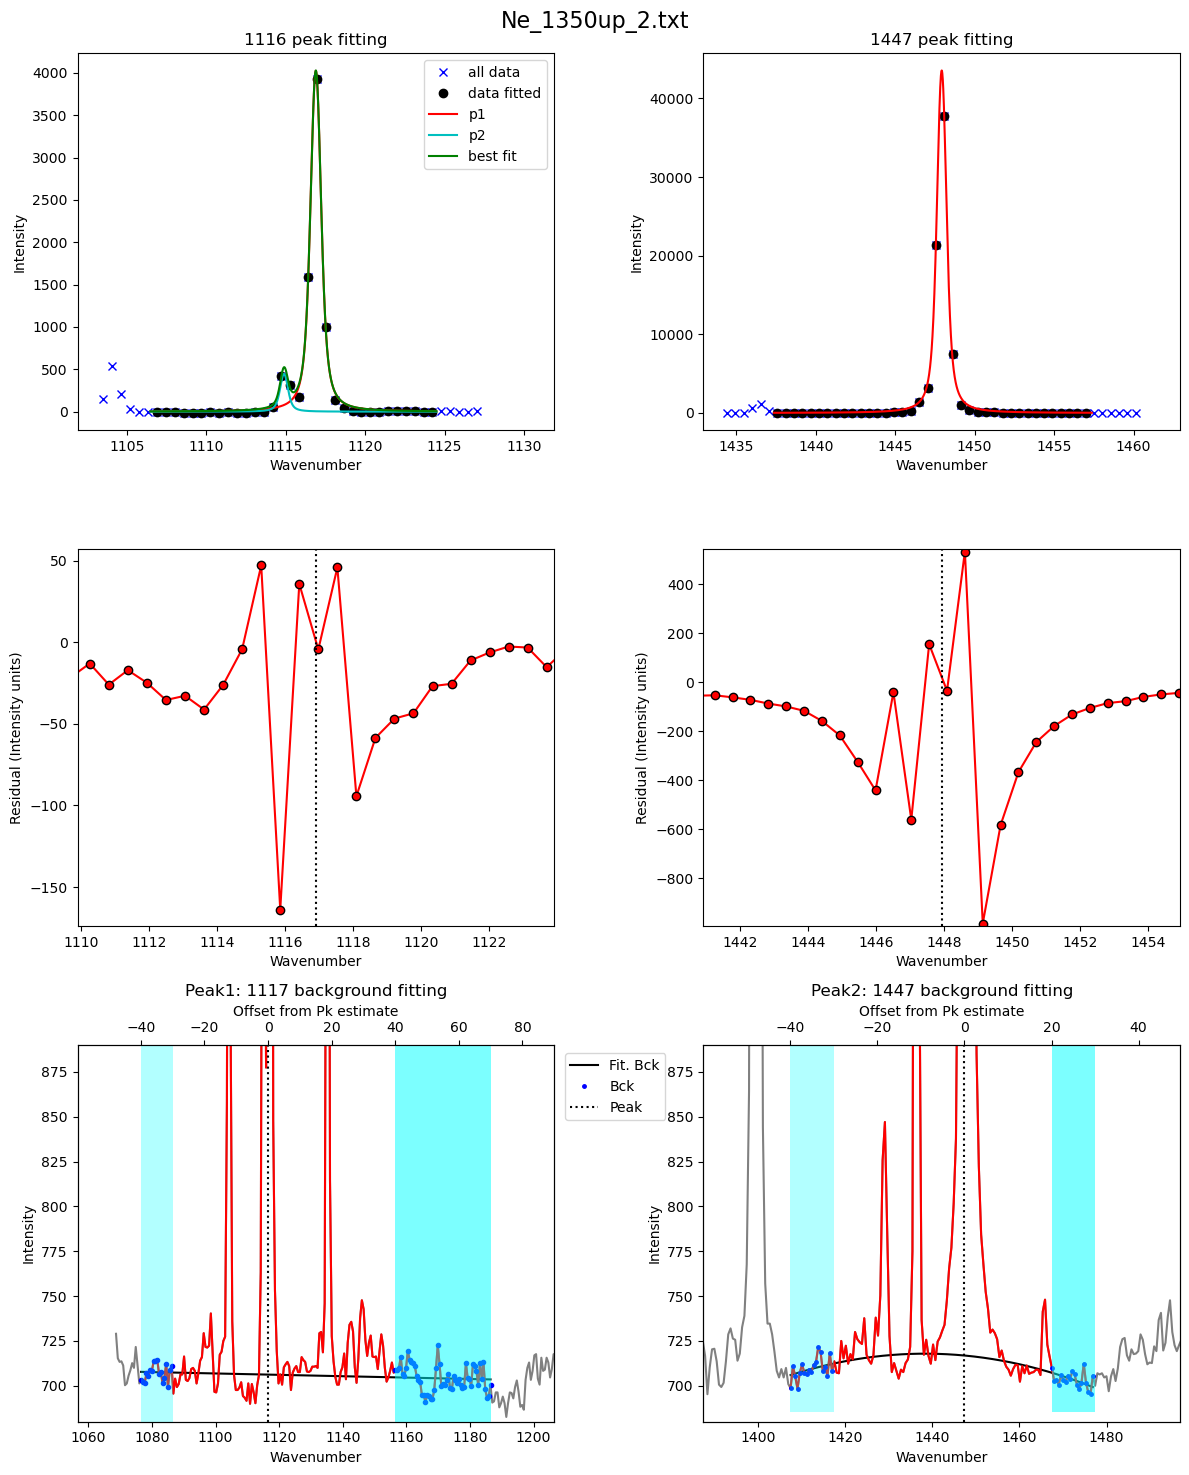

In [24]:
df2=pf.loop_Ne_lines(files=Ne_files, path=mypath, filetype='headless_txt',
                  config=Ne_Config, peaks_1=peaks_1, Ne=Ne, Ne_center_1=nearest_pk1,
                  Ne_center_2=nearest_pk2, DeltaNe_ideal=ideal_split['Ne_Split'], 
                  plot_figure=True, save_clipboard=True, single_acq=False)

In [25]:
df2

filename  pk2_peak_cent  pk2_amplitude  pk2_sigma  pk2_gamma  \
0   Ne_1225down_1.txt    1447.405771   45294.312975   0.219028   0.219028   
1   Ne_1225down_2.txt    1447.371403   41979.313100   0.223666   0.223666   
2     Ne_1225up_1.txt    1447.404197   45294.995077   0.219256   0.219256   
3     Ne_1225up_2.txt    1447.361205   42719.671901   0.223008   0.223008   
4   Ne_1250down_1.txt    1447.416023   44508.366631   0.191066   0.191066   
5   Ne_1250down_2.txt    1447.400250   42408.366140   0.191372   0.191372   
6     Ne_1250up_1.txt    1447.491667   41483.531369   0.209715   0.209715   
7     Ne_1250up_2.txt    1447.431946   41450.753526   0.201352   0.201352   
8   Ne_1275down_1.txt    1447.613859   42991.419459   0.169379   0.169379   
9   Ne_1275down_2.txt    1447.584582   42623.842013   0.171995   0.171995   
10    Ne_1275up_1.txt    1447.675073   40447.898345   0.193981   0.193981   
11    Ne_1275up_2.txt    1447.626159   41988.194237   0.182323   0.182323   
12  Ne_1300down_1.txt    1447.568810   44356.877652   0.207045   0.207045   
13  Ne_1300down_2.txt    1447.597086   43206.762193   0.212740   0.212740   
14    Ne_1300up_1.txt    1447.704443   41640.786576   0.213397   0.213397   
15    Ne_1300up_2.txt    1447.623750   43174.975013   0.215462   0.215462   
16  Ne_1325down_1.txt    1447.663150   45587.861817   0.202959   0.202959   
17  Ne_1325down_2.txt    1447.723136   43431.440295   0.195439   0.195439   
18    Ne_1325up_1.txt    1447.784213   40636.164467   0.177581   0.177581   
19    Ne_1325up_2.txt    1447.732619   42871.437773   0.195022   0.195022   
20    Ne_1350up_1.txt    1447.983998   43071.938023   0.209155   0.209155   
21    Ne_1350up_2.txt    1447.925945   41923.576988   0.200918   0.200918   

    error_pk2  pk1_peak_cent  pk1_amplitude  pk1_sigma  pk1_gamma  error_pk1  \
0     0.00534    1116.653104    3809.881318   0.198918   0.198918        NaN   
1     0.00539    1116.588729    4128.533889   0.213124   0.213124        NaN   
2     0.00542    1116.646887    3835.477806   0.198570   0.198570        NaN   
3     0.00519    1116.575170    4203.388355   0.216347   0.216347        NaN   
4     0.00300    1116.569680    3900.790470   0.174790   0.174790        NaN   
5     0.00257    1116.533134    4124.431752   0.189476   0.189476        NaN   
6     0.00446    1116.613944    4043.265918   0.162353   0.162353        NaN   
7     0.00351    1116.561220    4183.290637   0.182959   0.182959        NaN   
8     0.00156    1116.635165    3779.049463   0.211854   0.211854        NaN   
9     0.00126    1116.551346    4182.813842   0.193819   0.193819        NaN   
10    0.00332    1116.706579    3835.073457   0.220036   0.220036        NaN   
11    0.00208    1116.616304    4173.955309   0.212248   0.212248        NaN   
12    0.00469    1116.559915    3683.592922   0.201879   0.201879        NaN   
13    0.00494    1116.555845    4052.229766   0.203898   0.203898        NaN   
14    0.00527    1116.673681    3868.853769   0.216910   0.216910        NaN   
15    0.00501    1116.576725    4299.367862   0.208798   0.208798        NaN   
16    0.00527    1116.581279    3736.395386   0.187442   0.187442        NaN   
17    0.00473    1116.615347    4198.050880   0.205425   0.205425        NaN   
18    0.00269    1116.696551    4072.502385   0.218583   0.218583        NaN   
19    0.00458    1116.617420    4276.912430   0.203966   0.203966        NaN   
20    0.00471    1116.981298    4058.931556   0.223331   0.223331        NaN   
21    0.00393    1116.898170    4323.400595   0.224229   0.224229        NaN   

       deltaNe   Ne_Corr  Ne_Corr_min  Ne_Corr_max  residual_pk2  \
0   330.752667  0.999168          NaN          NaN    206.733398   
1   330.782674  0.999078          NaN          NaN    201.287688   
2   330.757311  0.999154          NaN          NaN    214.761512   
3   330.786034  0.999068          NaN          NaN    195.815660   
4   330.846343  0.998886          NaN          NaN    162.93

# If any are weird, can fit again here
- If you refit, you'll have to replace the value in the saved dataframe

In [38]:
# # Which file
# filename2=Ne_files[1]  # Or you could put a string here, like 'NE1.txt' 

# # Tweak fit

# Ne_Config2=pf.Ne_peak_config(amplitude=100, LH_offset_mini=[2, 5], 
# lower_bck_pk1=(-50, -30), upper_bck1_pk1=[7, 13], upper_bck2_pk1=[50, 80],
# lower_bck_pk2=[-40, -30], upper_bck1_pk2=[15, 50], upper_bck2_pk2=[50, 80],
# x_range_peak=15, x_span_pk1=[-10, 8], x_span_pk2=[-10, 10])
# Ne_Config

# # You also need to set whether you want 1 peak or 2 for the LH diad
# peaks_1=2

# df_test=pf.fit_Ne_lines(  
#     config=Ne_Config2, peaks_1=peaks_1,
#     Ne=Ne, filename=filename2, path=mypath, prefix=prefix,
#     Ne_center_1=nearest_pk1, Ne_center_2=nearest_pk2,
#     DeltaNe_ideal=ideal_split['Ne_Split'])                                                                 
                                                                     
        
# #config: Ne_peak_config=Ne_peak_config(),

## Stitching meta data with Ne line data

In [26]:
# See what deliminators you have in your metadata file you have just got
print(meta['filename'][0])

Ne_1225down_1.txt


In [27]:
# remove these to get the pure file name you can compare 
file_m=pf.extracting_filenames_generic(names=meta['filename'],
    prefix=False,
    suffix=False,
   file_type='.txt')

file_m

array(['Ne_1325down_1', 'Ne_1300down_1', 'Ne_1275down_1', 'Ne_1250down_1',
       'Ne_1225down_1', 'Ne_1225up_1', 'Ne_1250up_1', 'Ne_1275up_1',
       'Ne_1300up_1', 'Ne_1325up_1', 'Ne_1350up_1', 'Ne_1325down_2',
       'Ne_1300down_2', 'Ne_1275down_2', 'Ne_1250down_2', 'Ne_1225down_2',
       'Ne_1225up_2', 'Ne_1250up_2', 'Ne_1275up_2', 'Ne_1300up_2',
       'Ne_1325up_2', 'Ne_1350up_2'], dtype=object)

In [28]:
name=meta['filename'].iloc[0]
name

'Ne_1325down_1.txt'

In [29]:
# See what file names you have for your actual datafiles
print(df2['filename'][0])

Ne_1225down_1.txt


In [30]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(names=df2['filename'],
    prefix=False, suffix=False,
   file_type='.txt')
file_s

array(['Ne_1225down_1', 'Ne_1225down_2', 'Ne_1225up_1', 'Ne_1225up_2',
       'Ne_1250down_1', 'Ne_1250down_2', 'Ne_1250up_1', 'Ne_1250up_2',
       'Ne_1275down_1', 'Ne_1275down_2', 'Ne_1275up_1', 'Ne_1275up_2',
       'Ne_1300down_1', 'Ne_1300down_2', 'Ne_1300up_1', 'Ne_1300up_2',
       'Ne_1325down_1', 'Ne_1325down_2', 'Ne_1325up_1', 'Ne_1325up_2',
       'Ne_1350up_1', 'Ne_1350up_2'], dtype=object)

## Now combining them

In [31]:
meta['name_for_matching']=file_m
df2['name_for_matching']=file_s
df_combo=df2.merge(meta, on='name_for_matching')

## Now lets inspect what our Ne correction factors actually look like

In [32]:
help(pf.plot_Ne_corrections)

Help on function plot_Ne_corrections in module DiadFit.ne_lines:

plot_Ne_corrections(df=None, x_axis=None, x_label='index', marker='o', mec='k', mfc='r')
    ## Plot to help inspect which Ne lines to discard



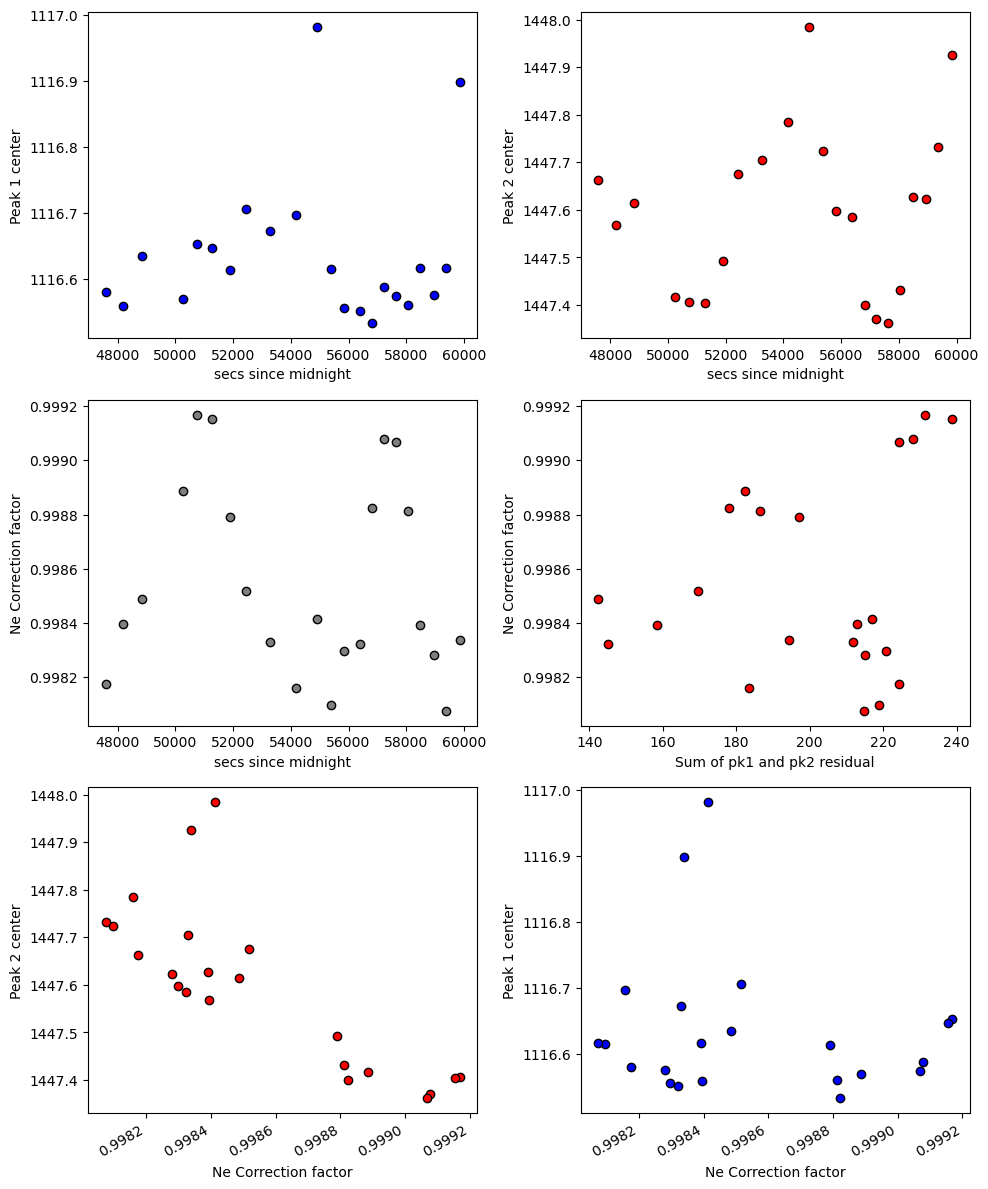

In [33]:
fig=pf.plot_Ne_corrections(df=df_combo, x_axis=df_combo['sec since midnight'],
                      x_label='secs since midnight')

## Now lets make a regression against time

C:\Users\penny\AppData\Local\Temp\ipykernel_1112\3812822093.py:1: RankWarning: Polyfit may be poorly conditioned
  model=pf.reg_Ne_lines_time(df=df_combo, N_poly=20, fit='poly')


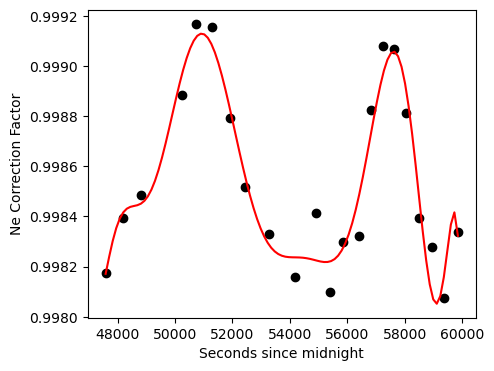

In [35]:
model=pf.reg_Ne_lines_time(df=df_combo, N_poly=20, fit='poly')

## Charlotte - would be good to make an option to have a regression in 2 parts, as this is obvious rubbish
- I have pasted the fitting function below, if you can work out how to do a 2 part linear regression based on a user-entered x cordinate, outputed as a single PF that would be great.

In [ ]:
from scipy.interpolate import interp1d
def reg_Ne_lines_time(df, fit='poly', N_poly=None, spline_fit=None):
    """
    Parameters
    -----------
    df: pd.DataFrame
        dataframe of stitched Ne fits and metadata information from WITEC,
        must have columns 'sec since midnight' and 'Ne_Corr'

    fit: float 'poly', or 'spline'
        If 'poly':
            N_poly: int, degree of polynomial to fit (1 if linear)
        if 'spline':
            spline_fit: The string has to be one of:
        ‘linear’, ‘nearest’, ‘nearest-up’, ‘zero’, ‘slinear’,
        ‘quadratic’, ‘cubic’, ‘previous’. Look up documentation for interpld

    Returns
    -----------
    figure of fit and data used to make it
    Pf: fit model, can be used to evaluate unknown data (only within x range of df for spline fits).




    """
    Px=np.linspace(np.min(df['sec since midnight']), np.max(df['sec since midnight']),
                         101)
    if fit=='poly':
        Pf = np.poly1d(np.polyfit(df['sec since midnight'], df['Ne_Corr'],
                              N_poly))

    if fit == 'spline':
            Pf = interp1d(df['sec since midnight'], df['Ne_Corr'], kind=spline_fit)

    Py=Pf(Px)

    fig, (ax1) = plt.subplots(1, 1, figsize=(5, 4))
    ax1.plot(df['sec since midnight'], df['Ne_Corr'], 'ok')
    ax1.plot(Px, Py, '-r')
    ax1.set_xlabel('Seconds since midnight')
    ax1.set_ylabel('Ne Correction Factor')

    ax1.ticklabel_format(useOffset=False)


    return Pf

## SAving as pickle, can then load as a pickle

In [48]:
import pickle
with open('Ne_Line_Regression_ExampleVIBE.pck', 'wb') as file_handle:
    pickle.dump(model, file_handle)

In [49]:
with open('Ne_Line_Regression_ExampleVIBE.pck', 'rb') as file_handle:
    my_loaded_model = pickle.load(file_handle)

## You can then load these pickles into the notebook where you fit your Diad data|